# Liverpool Challenge

The goal of this notebook is to do the Liverpool Challange: an activity proposed by David Sumpter on Friends of Tracking (a YouTube Channel about data science on football) that consist in analysing goals made by Liverpoll in 2019 in order to do a report to a club coach, who is about to play against Jurgen Klopp's machine.

In [1]:
import pandas as pd
import numpy as np
import footyviz
import pickle
from matplotlib import pyplot as plt

## Data exploration

Let's first load in the data

In [2]:
liverpool_data = pd.read_csv('liverpool2019/liverpool_2019.csv',index_col=('play', 'frame'))
liverpool_data.head()

Unnamed: 0 bgcolor        dx        dy  \
play                          frame                                           
Liverpool [3] - 0 Bournemouth 0               0     NaN  0.000000  0.000000   
                              1               1     NaN  0.185745  1.217580   
                              2               2     NaN  0.178659  1.171133   
                              3               3     NaN  0.171573  1.124685   
                              4               4     NaN  0.164488  1.078238   

                                    edgecolor  player  player_num team  \
play                          frame                                      
Liverpool [3] - 0 Bournemouth 0           NaN       0         NaN  NaN   
                              1           NaN       0         NaN  NaN   
                              2           NaN       0         NaN  NaN   
                              3           NaN       0         NaN  NaN   
                              4           NaN       0         NaN  NaN   

                                             x          y    z  
play                          frame                             
Liverpool [3] - 0 Bournemouth 0      46.394558  11.134454  0.0  
                              1      46.580302  12.352034  0.0  
                              2      46.758961  13.523166  0.0  
                              3      46.930535  14.647852  0.0  
                              4      47.095022  15.726090  0.0

In [3]:
liverpool_passes = pd.read_csv('liverpool2019/liverpool_2019_passes.csv')
liverpool_passes.head()

,Unnamed: 0,from_team,from_x,from_y,from_frame,from_player_num,to_team,to_x,to_y,to_frame,to_player_num,play
0,0,attack,46.394558,11.134454,0,10.0,attack,48.844160,27.191910,22.0,8.0,Liverpool [3] - 0 Bournemouth
1,1,attack,51.813185,28.611598,42,8.0,attack,85.565258,30.767056,108.0,9.0,Liverpool [3] - 0 Bournemouth
2,2,attack,85.565258,30.767056,108,9.0,attack,86.219036,33.236389,118.0,11.0,Liverpool [3] - 0 Bournemouth
3,0,attack,36.054422,68.277311,16,4.0,attack,82.955888,73.003584,78.0,10.0,Bayern 0 - [1] Liverpool
4,0,attack,47.429230,15.842044,14,26.0,attack,28.497923,7.131785,42.0,10.0,Fulham 0 - [1] Liverpool


Now we map all liverpool goals the data set

In [4]:
#list of goals included in the dataset
liverpool_data.index.get_level_values('play').unique()

Index(['Liverpool [3] - 0 Bournemouth', 'Bayern 0 - [1] Liverpool',
       'Fulham 0 - [1] Liverpool', 'Southampton 1 - [2] Liverpool',
       'Liverpool [2] - 0 Porto', 'Porto 0 - [2] Liverpool',
       'Liverpool [4] - 0 Barcelona', 'Liverpool [1] - 0 Wolves',
       'Liverpool [3] - 0 Norwich', 'Liverpool [2] - 1 Chelsea',
       'Liverpool [2] - 1 Newcastle', 'Liverpool [2] - 0 Salzburg',
       'Genk 0 - [3] Liverpool', 'Liverpool [2] - 0 Man City',
       'Liverpool [1] - 0 Everton', 'Liverpool [2] - 0 Everton',
       'Bournemouth 0 - 3 Liverpool', 'Liverpool [1] - 0 Watford',
       'Leicester 0 - [3] Liverpool'],
      dtype='object', name='play')

In [5]:
# goal by
for goal in liverpool_data.index.get_level_values('play').unique():
   print("Game: " + goal + "; Scored by: " + str(liverpool_passes.loc[liverpool_passes['play'] == goal].tail(1)['to_player_num'].values[0]) + "; Assisted by: " + str(liverpool_passes.loc[liverpool_passes['play'] == goal].tail(1)['from_player_num'].values[0]) + '.')


Game: Liverpool [3] - 0 Bournemouth; Scored by: 11.0; Assisted by: 9.0.
Game: Bayern 0 - [1] Liverpool; Scored by: 10.0; Assisted by: 4.0.
Game: Fulham 0 - [1] Liverpool; Scored by: 10.0; Assisted by: 9.0.
Game: Southampton 1 - [2] Liverpool; Scored by: 11.0; Assisted by: 14.0.
Game: Liverpool [2] - 0 Porto; Scored by: 9.0; Assisted by: 66.0.
Game: Porto 0 - [2] Liverpool; Scored by: 11.0; Assisted by: 66.0.
Game: Liverpool [4] - 0 Barcelona; Scored by: 27.0; Assisted by: 66.0.
Game: Liverpool [1] - 0 Wolves; Scored by: 10.0; Assisted by: 66.0.
Game: Liverpool [3] - 0 Norwich; Scored by: 27.0; Assisted by: 66.0.
Game: Liverpool [2] - 1 Chelsea; Scored by: 10.0; Assisted by: 9.0.
Game: Liverpool [2] - 1 Newcastle; Scored by: 10.0; Assisted by: 9.0.
Game: Liverpool [2] - 0 Salzburg; Scored by: 26.0; Assisted by: 66.0.
Game: Genk 0 - [3] Liverpool; Scored by: 10.0; Assisted by: 11.0.
Game: Liverpool [2] - 0 Man City; Scored by: 11.0; Assisted by: 26.0.
Game: Liverpool [1] - 0 Everton; Sco

Let's goal to some tradicional stats: who scored and assist most?

In [6]:
# goal by
goals = []
assists = []
for goal in liverpool_data.index.get_level_values('play').unique():
   goals.append(int(liverpool_passes.loc[liverpool_passes['play'] == goal].tail(1)['to_player_num'].values[0]))
   assists.append(int(liverpool_passes.loc[liverpool_passes['play'] == goal].tail(1)['from_player_num'].values[0]))

In [7]:
players, count = np.unique(goals, return_counts=True)
print("Goals:")
print(players)
print(count)

Goals:
[ 9 10 11 23 26 27]
[2 6 6 1 1 3]


In [8]:
players, count = np.unique(assists, return_counts=True)
print("Assists:")
print(players)
print(count)

Assists:
[ 4  8  9 10 11 14 26 66]
[1 1 4 3 1 1 1 7]


Top Scores:
1.Salah
1.Mané
3.Origi
4.Firmino
5.Robertson
5.Shaqiri

Top Assiters:
1.Trent
1.Firmino
3.Mané
4.Van Dijk
4.Keita
4.Salah
4.Henderson
4.Robertson

The next step is non-python related: watch each one of these goals and try to get some insights. I'll be using the notebook to take my notes.

Liverpool [3] - 0 Bournemouth -> fast foward attack, precise pass to firmino, that does excellen run to pass to salah. left back colud not get him. https://www.youtube.com/watch?v=yvGTQnERlC4&t=71s

Bayern 0 - [1] Liverpool -> van dijk long ball to mane. again, space between wing and center back https://www.youtube.com/watch?v=_rPuWjXVgc0&t=22s

Fulham 0 - [1] Liverpool -> a lot of defence on the area. they think firmino is offside. great run to the center by mane. https://www.youtube.com/watch?v=IHR2TQtytoA&t=41s

Southampton 1 - [2] Liverpool -> salah solo run in counter attack. firmino helps getting more space https://www.youtube.com/watch?v=Cquakiwvff4

Liverpool [2] - 0 Porto -> great henderson ball to trent between left back and lewf wing to a nearly offside and free firmino https://www.youtube.com/watch?v=JKatpjRSckE

Porto 0 - [2] Liverpool -> counter attack great pass by trent and great run by salah, no right back defending https://www.youtube.com/watch?v=LOZHqTiFdP8

Liverpool [4] - 0 Barcelona -> corner with too much space

Liverpool [1] - 0 Wolves -> inverting side to one-to-two situation for trent and henderson. left back takes long to go for it. grat pass to inside the area mane. mane and salah in front of goal with origi a bit behind. https://www.youtube.com/watch?v=1VTktLS2PzI

Liverpool [3] - 0 Norwich ->  (check if is that one) long cross by trent to origi, that is in between center and right back https://www.youtube.com/watch?v=5WWOpHQ1yJo

Liverpool [2] - 1 Chelsea -> firmino goes a little to the left, creating space for mane to score the goal https://www.youtube.com/watch?v=Q0htMMdLSlg

Liverpool [2] - 1 Newcastle -> firmino gets the ball together with matip in the offensive zone and finds mané between the center defenderes https://www.youtube.com/watch?v=ZMPihAQzrGQ

Liverpool [2] - 0 Salzburg -> robertson runs towards and gets into foward position. henderson finds trent with a lot of space https://www.youtube.com/watch?v=gl-5I4iys_c

Genk 0 - [3] Liverpool -> firmino dpwn on the letf creating space for mané on the center; he receives it from salah https://www.youtube.com/watch?v=WKPG0DiXd_A

Liverpool [2] - 0 Man City -> inversion of side by trent to robertson, that finds in a cross salah in between the defender and the left back https://www.youtube.com/watch?v=kOXtH55Db2I

Liverpool [1] - 0 Everton -> mané finds lovely ball to origi in between the defenders and in front of the goalkeeper https://www.youtube.com/watch?v=DpKCzifbu8o

Liverpool [2] - 0 Everton -> mané finds lovely ball to shaqiri, that does a great run, in between the defenders  https://www.youtube.com/watch?v=DpKCzifbu8o

Bournemouth 0 - [3] Liverpool -> keita regains possession from a bad pass and finds salah in between the defenders https://www.youtube.com/watch?v=wYJUg_tdqOw

Liverpool [1] - 0 Watford -> counter attack, great dribble by salah https://www.youtube.com/watch?v=R09uTGzg1BQ

Leicester 0 - [3] Liverpool -> great run by firmino, milner finds trent with space as the full back tries to avoid the pass https://www.youtube.com/watch?v=TQjqT17gO9A

Now that we have looked at the data, we can make some more precise analysis. To that, I've used another notebook to convert the data to a more familiar way.

## Liverpool Goals

Getting the converted data

In [9]:
#plays list
plays = liverpool_data.index.get_level_values('play').unique()

#initialize dictionnary
plays_data = {}
for play in plays:
   tracking_home = pd.read_csv('liverpool2019/metrica_format/'+play.replace(' ','_')+'/tracking_home.csv')
   tracking_away = pd.read_csv('liverpool2019/metrica_format/'+play.replace(' ','_')+'/tracking_away.csv')
   players_num = pd.read_csv('liverpool2019/metrica_format/'+play.replace(' ','_')+'/players_num.csv')
   events = pd.read_csv('liverpool2019/metrica_format/'+play.replace(' ','_')+'/events.csv')
   try :
      off_ball_scoring = pickle.load(open('liverpool2019/metrica_format/'+play.replace(' ','_')+'/off_ball_scoring', 'rb'))
   except:
      plays_data[play] = {'tracking_home':tracking_home}
      plays_data[play]['tracking_away'] = tracking_away
      plays_data[play]['players_num'] = players_num
      plays_data[play]['events'] = events
   else:
      plays_data[play] = {'tracking_home':tracking_home}
      plays_data[play]['tracking_away'] = tracking_away
      plays_data[play]['players_num'] = players_num
      plays_data[play]['events'] = events
      plays_data[play]['off_ball_scoring'] = off_ball_scoring
   

In [10]:
plays_data['Liverpool [3] - 0 Bournemouth']['tracking_home']

,Frame,Home_14_x,Home_14_y,Home_331_x,Home_331_y,Home_471_x,Home_471_y,Home_472_x,Home_472_y,Home_648_x,...,Home_876_x,Home_876_y,Home_877_x,Home_877_y,Home_878_x,Home_878_y,ball_x,ball_y,Period,Time [s]
0,0,1.658503,-27.857143,7.282993,-32.571429,-3.821769,-26.428571,-4.687075,-16.571429,-13.202749,...,-4.110204,-30.714286,-14.493878,-24.714286,-20.55102,-10.857143,-3.821769,-26.428571,1,0.00
1,1,1.770147,-27.572889,7.303193,-32.627482,-3.568616,-26.403617,-4.561637,-16.530715,-12.896997,...,-4.003326,-30.637434,-14.493878,-24.714286,-20.55102,-10.857143,-3.624879,-25.600617,1,0.05
2,2,1.891341,-27.294866,7.322565,-32.669553,-3.320783,-26.382584,-4.431676,-16.488931,-12.599139,...,-3.894047,-30.562319,-14.493878,-24.714286,-20.55102,-10.857143,-3.435501,-24.804247,1,0.10
3,3,2.021879,-27.022913,7.341422,-32.698060,-3.078009,-26.365280,-4.297414,-16.446129,-12.308787,...,-3.782465,-30.488903,-14.493878,-24.714286,-20.55102,-10.857143,-3.253633,-24.039461,1,0.15
4,4,2.161553,-26.756867,7.360081,-32.713421,-2.840030,-26.351511,-4.159075,-16.402362,-12.025551,...,-3.668680,-30.417150,-14.493878,-24.714286,-20.55102,-10.857143,-3.079276,-23.306259,1,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,150,48.360659,-14.635499,45.015127,-5.349822,30.387826,-11.691092,16.801964,-10.295995,40.630443,...,12.435104,-25.075009,-14.493878,-24.714286,-20.55102,-10.857143,53.721088,3.285714,1,7.50
151,151,48.360659,-14.635499,45.015127,-5.349822,30.387826,-11.691092,16.801964,-10.295995,40.630443,...,12.435104,-25.075009,-14.493878,-24.714286,-20.55102,-10.857143,53.721088,3.285714,1,7.55
152,152,48.360659,-14.635499,45.015127,-5.349822,30.387826,-11.691092,16.801964,-10.295995,40.630443,...,12.435104,-25.075009,-14.493878,-24.714286,-20.55102,-10.857143,53.721088,3.285714,1,7.60
153,153,48.360659,-14.635499,45.015127,-5.349822,30.387826,-11.691092,16.801964,-10.295995,40.630443,...,12.435104,-25.075009,-14.493878,-24.714286,-20.55102,-10.857143,53.721088,3.285714,1,7.65


In [11]:
plays_data['Liverpool [3] - 0 Bournemouth']['tracking_away']

,Frame,Away_549_x,Away_549_y,Away_893_x,Away_893_y,Away_894_x,Away_894_y,Away_1066_x,Away_1066_y,Away_1067_x,...,Away_1070_x,Away_1070_y,Away_1492_x,Away_1492_y,Away_5518_x,Away_5518_y,ball_x,ball_y,Period,Time [s]
0,0,46.882376,-3.008992,-10.023129,-9.285714,-9.634072,-30.196227,6.417687,-25.714286,-1.225850,...,0.648980,-26.714286,-4.620439,-26.337642,-8.763732,-24.526818,-3.821769,-26.428571,1,0.00
1,1,46.868506,-3.004977,-9.847743,-9.290159,-9.634072,-30.196227,6.434644,-25.507293,-0.935750,...,0.597481,-26.637741,-4.443526,-26.354521,-8.575107,-24.401240,-3.624879,-25.600617,1,0.05
2,2,46.856602,-3.001530,-9.664009,-9.295072,-9.634072,-30.196227,6.462034,-25.302417,-0.653774,...,0.560914,-26.558726,-4.266628,-26.364641,-8.386752,-24.267056,-3.435501,-24.804247,1,0.10
3,3,46.846566,-2.998625,-9.472336,-9.300433,-9.634072,-30.196227,6.499548,-25.099606,-0.379569,...,0.538898,-26.477314,-4.089877,-26.368260,-8.198493,-24.124656,-3.253633,-24.039461,1,0.15
4,4,46.838303,-2.996232,-9.273135,-9.306217,-9.634072,-30.196227,6.546877,-24.898811,-0.112784,...,0.531054,-26.393577,-3.913404,-26.365636,-8.010154,-23.974426,-3.079276,-23.306259,1,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,150,47.207658,-2.711340,2.235374,-9.571429,-9.634072,-30.196227,47.368105,-3.608701,44.701868,...,29.925170,-7.857143,1.282791,-24.194875,34.290379,-7.052904,53.721088,3.285714,1,7.50
151,151,47.207658,-2.711340,2.235374,-9.571429,-9.634072,-30.196227,47.368105,-3.608701,44.701868,...,29.925170,-7.857143,1.282791,-24.194875,34.290379,-7.052904,53.721088,3.285714,1,7.55
152,152,47.207658,-2.711340,2.235374,-9.571429,-9.634072,-30.196227,47.368105,-3.608701,44.701868,...,29.925170,-7.857143,1.282791,-24.194875,34.290379,-7.052904,53.721088,3.285714,1,7.60
153,153,47.207658,-2.711340,2.235374,-9.571429,-9.634072,-30.196227,47.368105,-3.608701,44.701868,...,29.925170,-7.857143,1.282791,-24.194875,34.290379,-7.052904,53.721088,3.285714,1,7.65


In [12]:
plays_data['Liverpool [3] - 0 Bournemouth']['players_num']

,Unnamed: 0,0
0,14,9.0
1,331,11.0
2,471,10.0
3,472,8.0
4,648,NaN
5,876,5.0
6,877,NaN
7,878,NaN
8,549,NaN
9,893,NaN


In [13]:
plays_data['Liverpool [3] - 0 Bournemouth']['events']

,Unnamed: 0,Team,Type,Subtype,Period,Start Frame,End Frame,Start Time [s],End Time [s],From,To,Start X,Start Y,End X,End Y
0,0,Home,PASS,NaN,1.0,0,22.0,0.0,1.1,10.0,8.0,-3.821769,-26.428571,-1.225191,-15.509501
1,1,Home,PASS,NaN,1.0,42,108.0,2.1,5.4,8.0,9.0,1.921977,-14.544113,37.699173,-13.078402
2,2,Home,PASS,NaN,1.0,108,118.0,5.4,5.9,9.0,11.0,37.699173,-13.078402,38.392178,-11.399255
3,3,Home,SET PIECE,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's take a deeper look now from where did liverpool scored

In [14]:
from metrica_scripts import Metrica_IO as mio
from metrica_scripts import Metrica_Viz as mviz
from metrica_scripts import Metrica_Velocities as mvel
from metrica_scripts import Metrica_PitchControl as mpc
from metrica_scripts import Metrica_EPV as mepv

In [15]:
frames=[132,130,168,232,178,234,120,136,116,163,89,164,152,140,168,244,126,192,96]
scorers=[11,10,10,11,9,11,27,10,27,10,10,26,10,11,27,23,11,11,9]
goals=pd.DataFrame(np.array([frames,scorers]).T,columns=['frame','player_num'],index=plays)

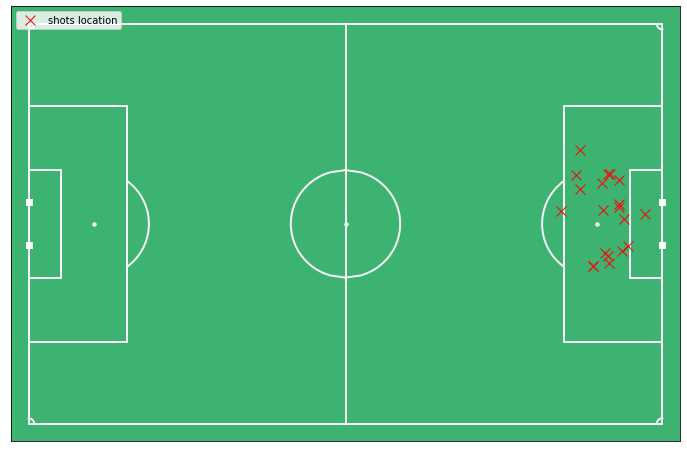

In [16]:
# draw pitch
fig,ax = mviz.plot_pitch()

# for each play draw shot location
for play in plays:
   
   tracking_home = plays_data[play]['tracking_home']
   x_ball = tracking_home['ball_x'].values
   y_ball = tracking_home['ball_y'].values
   
   # goal frame
   goal_frame=goals.loc[play,'frame']
   
   # convert as Liverpool attacked in the same direction (right)
   if x_ball[-1]<0:
      x_ball = - x_ball
      y_ball = - y_ball
   
   ax.plot(x_ball[goal_frame],y_ball[goal_frame],'rx',markersize=10)
   
   # legend
   if play==plays[0]:
      ax.plot(x_ball[goal_frame],y_ball[goal_frame],'rx',markersize=10,label='shots location')
ax.legend(loc='upper left')

As we can see, all goals are coming from inside box. What a about the pass to the goal, where do they come from?

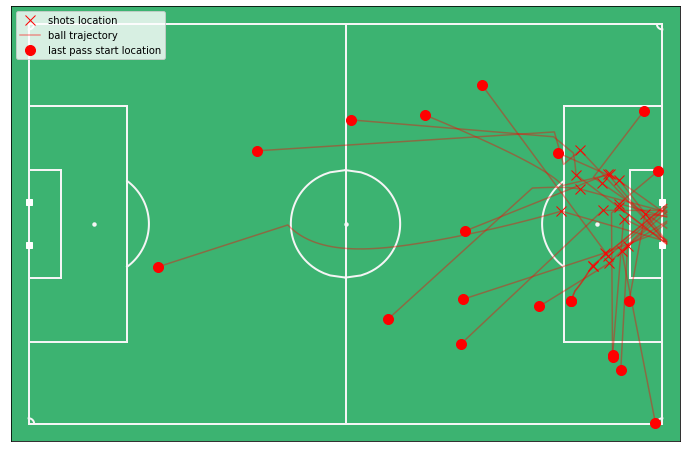

In [17]:
# draw pitch
fig,ax = mviz.plot_pitch()

# for each play draw ball's trajectory
for play in plays:
   tracking_home = plays_data[play]['tracking_home']
   x_ball = tracking_home['ball_x'].values
   y_ball = tracking_home['ball_y'].values
   
   # get last pass frame
   events = plays_data[play]['events'].copy()
   last_pass_frame = events.query('Type=="PASS"')['Start Frame'].max()
   
   # goal frame
   goal_frame=goals.loc[play,'frame']
   
   # convert as Liverpool attacked in the same direction (right)
   if x_ball[-1]<0:
      x_ball = - x_ball
      y_ball = - y_ball
   
   ax.plot(x_ball[goal_frame],y_ball[goal_frame],'rx',markersize=10)
   ax.plot(x_ball[last_pass_frame:],y_ball[last_pass_frame:],'r',alpha=0.4)
   ax.plot(x_ball[last_pass_frame],y_ball[last_pass_frame],'ro',markersize=10)
   
   # legend
   if play==plays[0]:
      ax.plot(x_ball[goal_frame],y_ball[goal_frame],'rx',markersize=10,label='shots location')
      ax.plot(x_ball[last_pass_frame:],y_ball[last_pass_frame:],'r',alpha=0.4,label='ball trajectory')
      ax.plot(x_ball[last_pass_frame],y_ball[last_pass_frame],'ro',markersize=10,label='last pass start location')
      
ax.legend(loc='upper left')

Liverpool has some pattern of scoring goals: fast counter-attacks, front press, ball in between the defense.

## Counter Attacks

We find four goals that came from a counter-attack

In [18]:
counter_attacks = ['Liverpool [3] - 0 Bournemouth',
                     'Southampton 1 - [2] Liverpool',
                     'Porto 0 - [2] Liverpool',
                     'Liverpool [1] - 0 Watford']   

In [19]:
# from metrica_scripts import VideoPitchControl as vpc
from metrica_scripts import animated_pitch_control as apc
from metrica_scripts import video_pitch_control as vpc

In [20]:
# # for each play draw shot location
# for play in counter_attacks:
#    if play == 'Liverpool [3] - 0 Bournemouth':
#       pass
#    else:
#       tracking_home = plays_data[play]['tracking_home']
#       tracking_away = plays_data[play]['tracking_away']
#       tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
#       tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')
#       events = plays_data[play]['events']
#       players_num = plays_data[play]['players_num']
#       players_to_annotate = players_num.dropna()

#       vpc.make_animation(tracking_home,tracking_away,'./outputs/counter_attacks',players_to_annotate,events,'new'+play)
#       # vpc.save_match_clip(tracking_home, tracking_away, events, 'outputs', fname="/counter_attacks/"+play, include_player_velocities=False)
#       # vpc.make_animation(tracking_home, tracking_away, events, fpath='outputs', fname="/counter_attacks/"+play, include_player_velocities=False)

# # ax.legend(loc='upper left')

In [21]:
# from moviepy import editor as mpy
# from moviepy.video.io.bindings import mplfig_to_npimage

# def draw_frame_x(df, t, fps, voronoi=False):
#     fig,ax,dfFrame = footyviz.draw_frame(df, t=t, fps=fps)
#     if voronoi:
#         fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
#     image = mplfig_to_npimage(fig)
#     plt.close()
#     return image    

# def make_animation(df, fps=20, voronoi=False):
#     #calculated variables
#     length=(df.index.max()+20)/fps
#     clip = mpy.VideoClip(lambda x: draw_frame_x(df, t=x, fps=fps, voronoi=voronoi), duration=length-1).set_fps(fps)
#     return clip

# for play in counter_attacks:
#     df = liverpool_data.loc[play]
#     clip = make_animation(df,voronoi=True)

#     # clip.ipython_display()
#     clip.write_videofile("./outputs/counter_attacks/voronoi"+play+".mp4")
#     clip.close()

./outputs/counter_attacks/Liverpool [3] - 0 Bournemouth0distancevoronoi
./outputs/counter_attacks/Liverpool [3] - 0 Bournemouth1distancevoronoi
./outputs/counter_attacks/Liverpool [3] - 0 Bournemouth2distancevoronoi
./outputs/counter_attacks/Southampton 1 - [2] Liverpool0distancevoronoi
./outputs/counter_attacks/Southampton 1 - [2] Liverpool1distancevoronoi
./outputs/counter_attacks/Porto 0 - [2] Liverpool0distancevoronoi
./outputs/counter_attacks/Porto 0 - [2] Liverpool1distancevoronoi
./outputs/counter_attacks/Porto 0 - [2] Liverpool2distancevoronoi
./outputs/counter_attacks/Liverpool [1] - 0 Watford0distancevoronoi
./outputs/counter_attacks/Liverpool [1] - 0 Watford1distancevoronoi


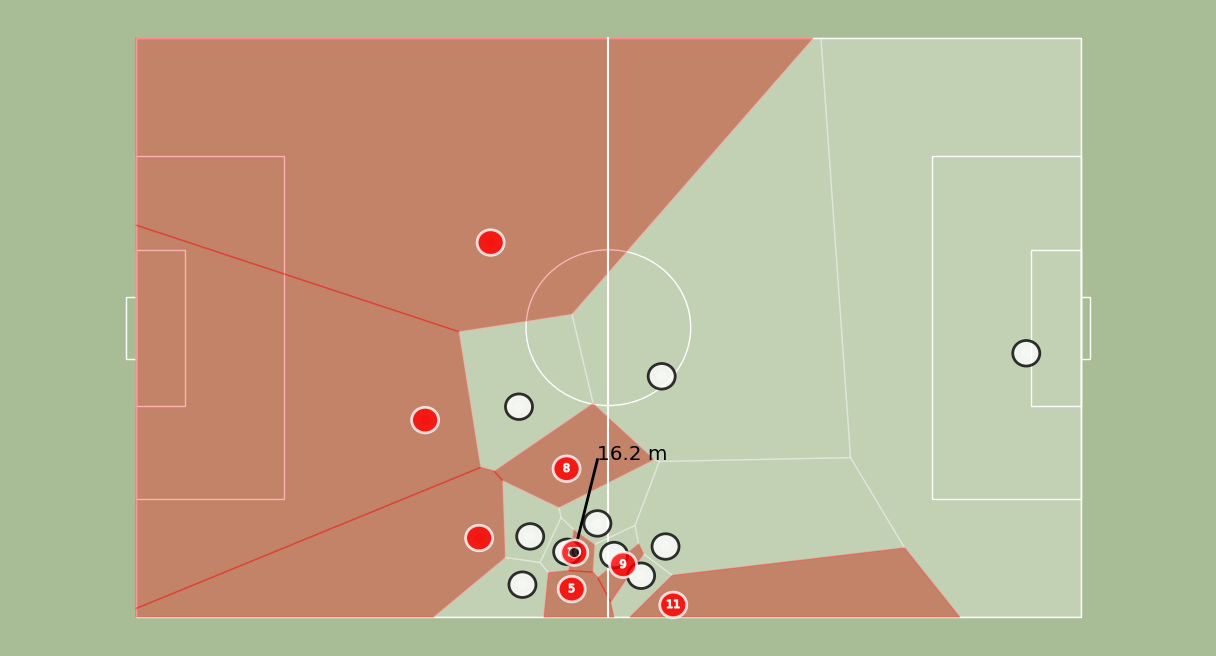

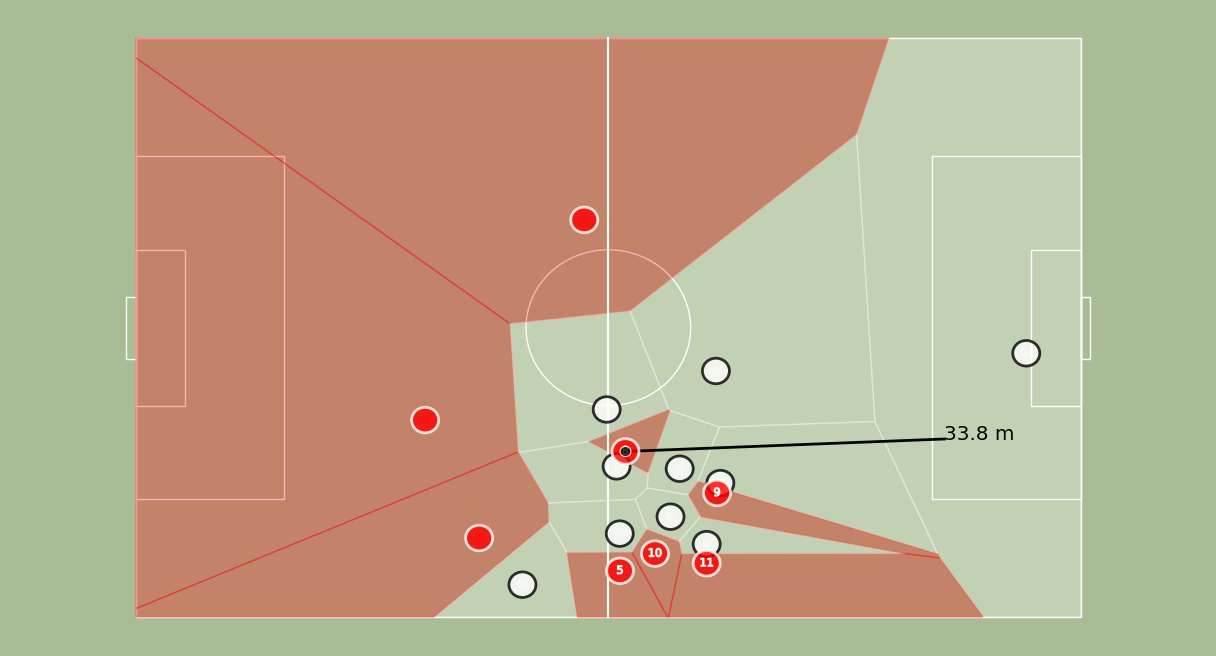

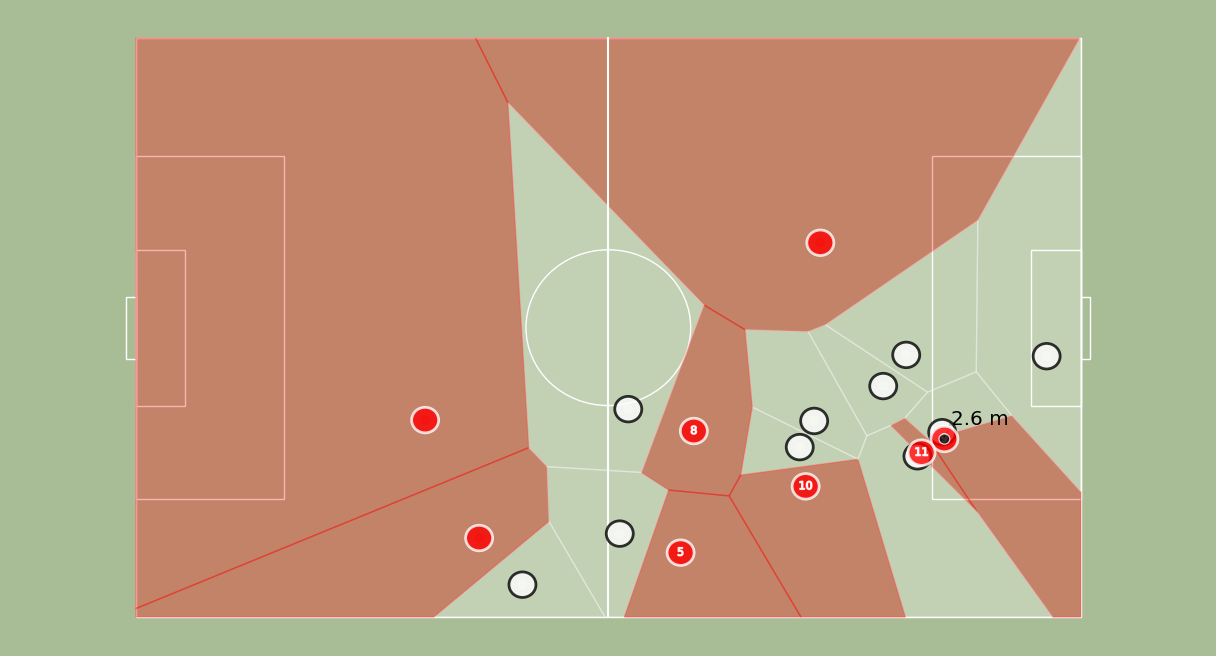

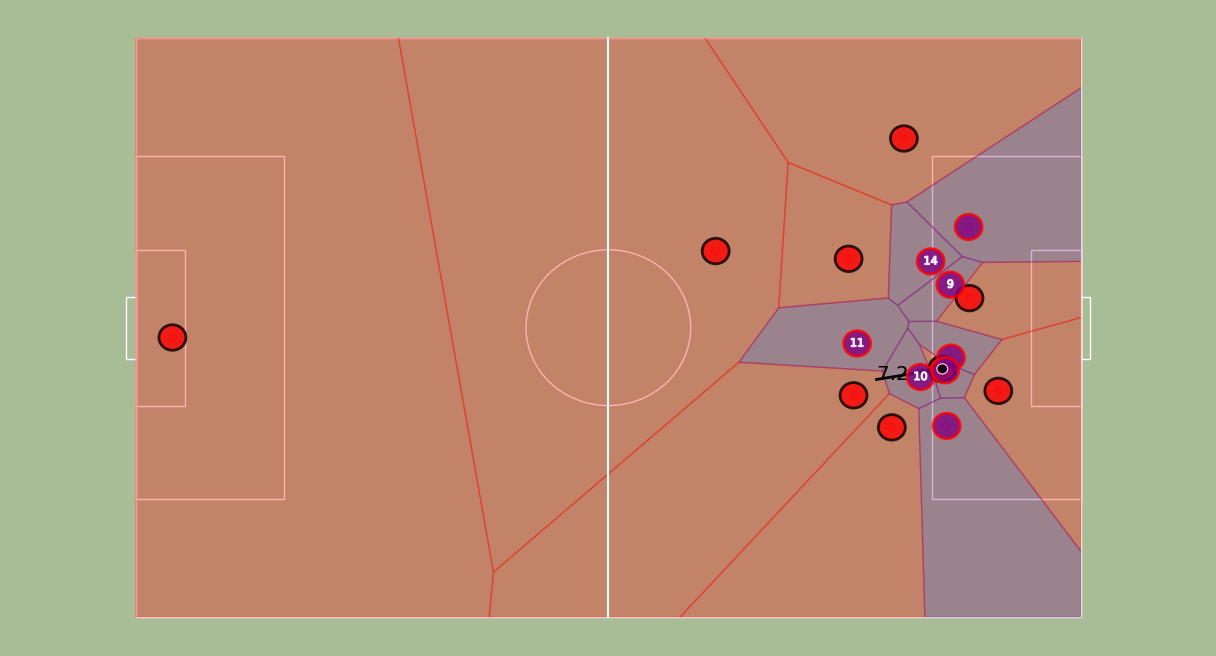

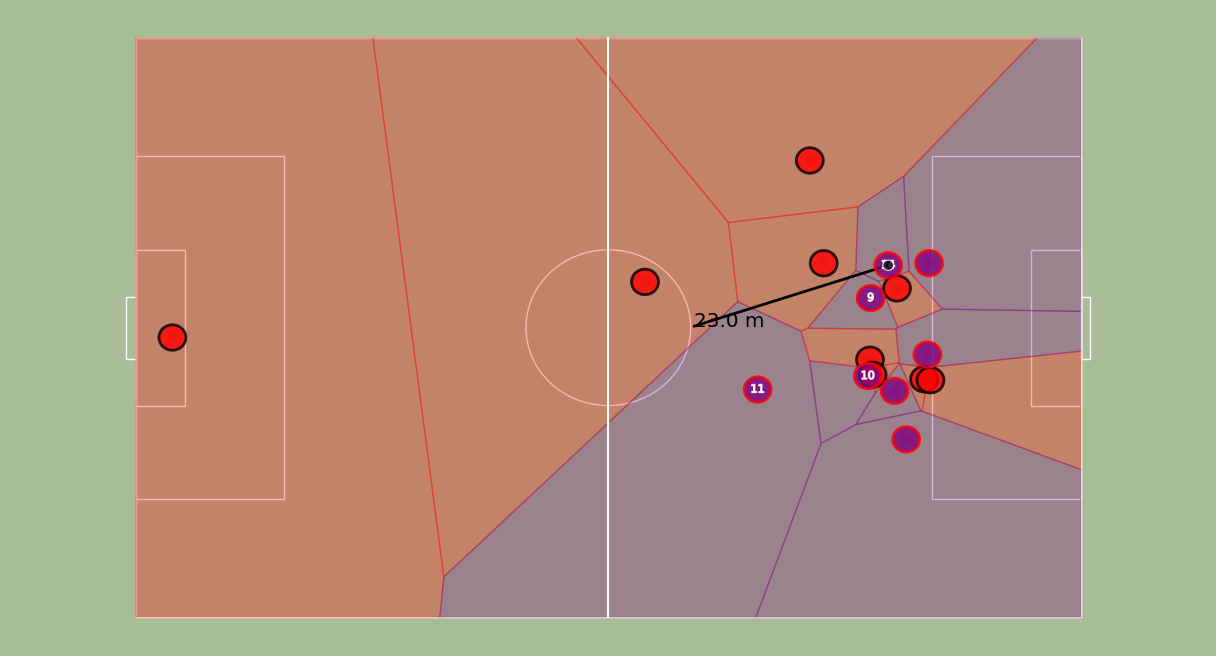

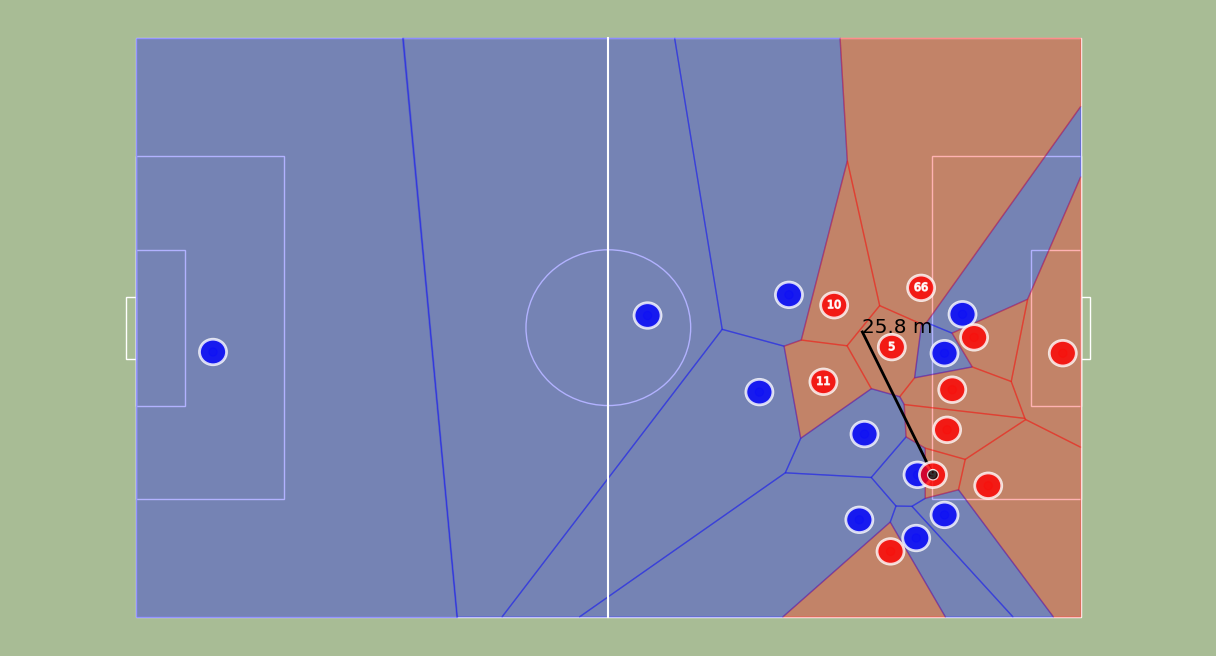

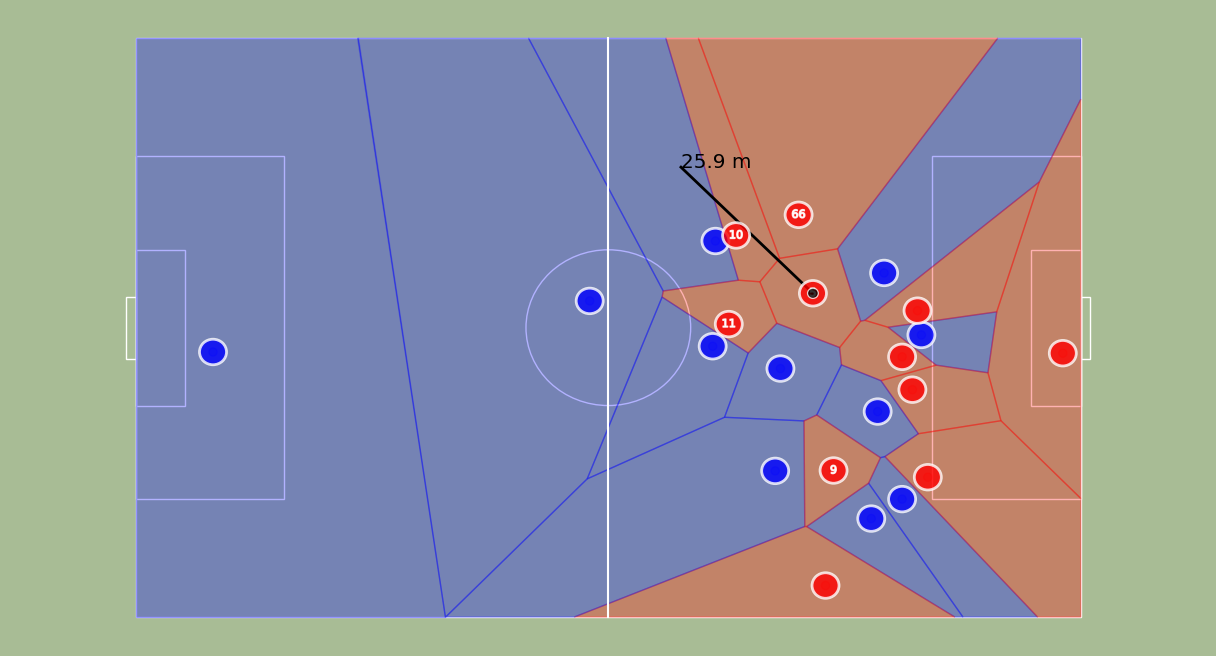

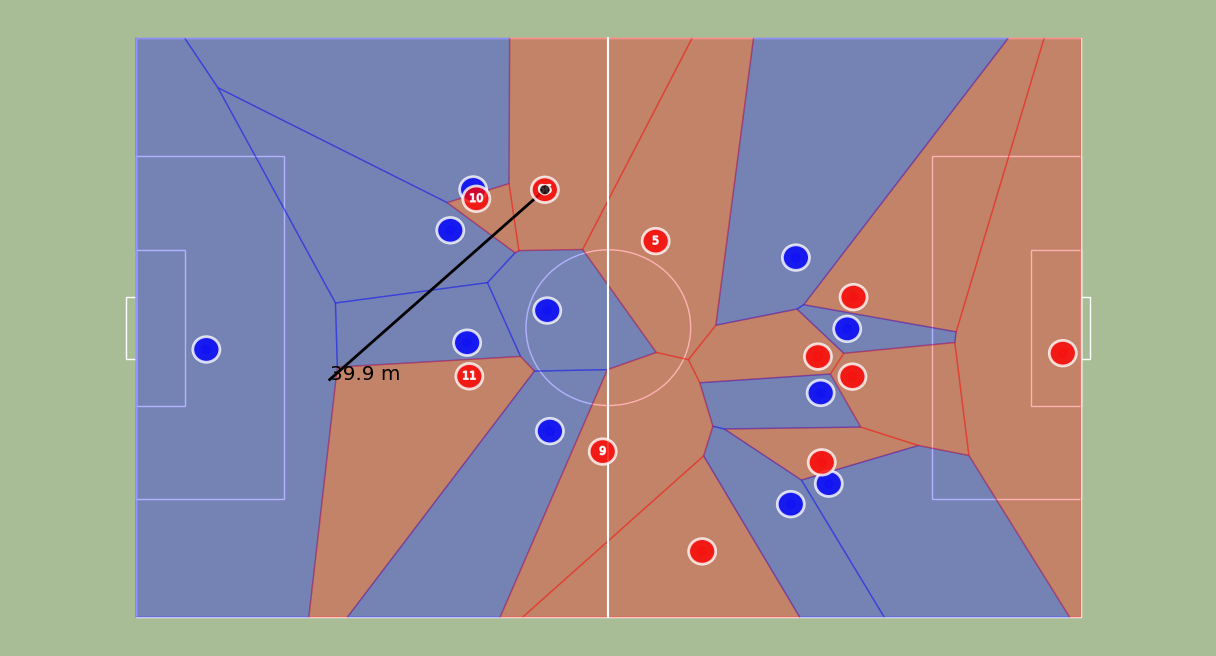

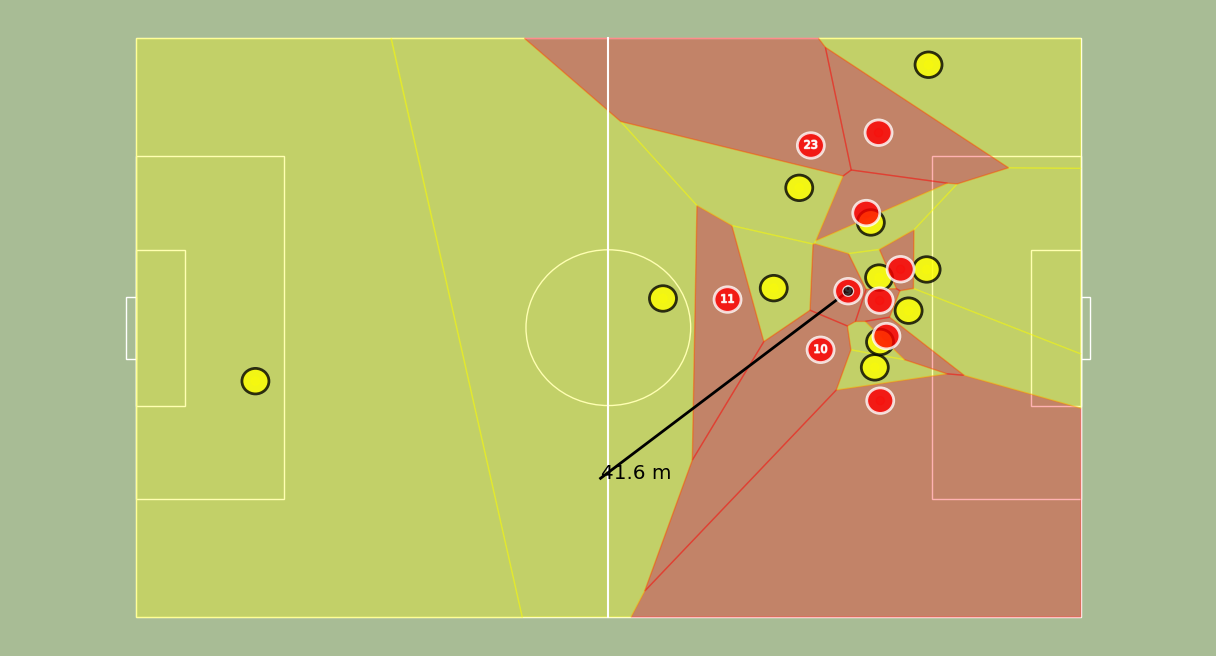

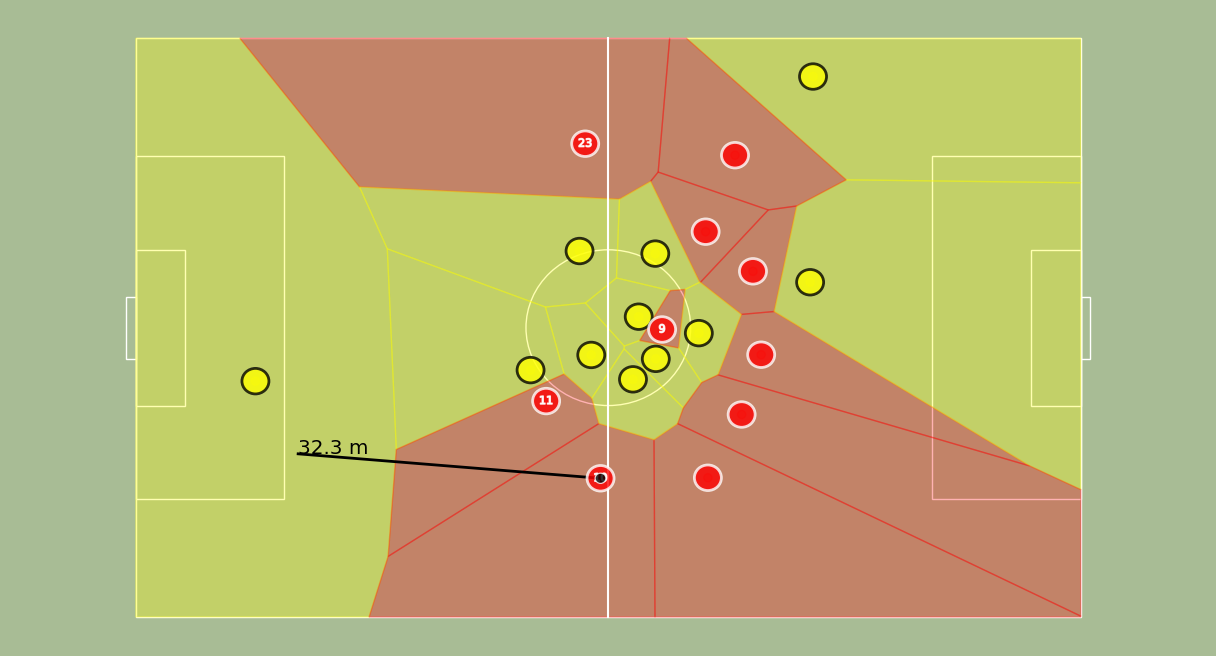

In [22]:
# for play in counter_attacks:
#    tracking_home = plays_data[play]['tracking_home']
#    tracking_away = plays_data[play]['tracking_away']
#    tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
#    tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')
#    events = plays_data[play]['events']
#    players_num = plays_data[play]['players_num']
#    players_to_annotate = players_num.dropna()
#    for row in events.iterrows():
#       # print(row[0])
#       if row[1]['Type'] == 'PASS':
#          params = vpc.parameters()
#          title = './outputs/between/'+play+'/'+play+str(row[0])
#          print(title+'.png')
         
#          # vpc.plot_pitch_control_for_event(row[0],events,tracking_home,tracking_away,params,title)

# for each play draw shot location
for play in counter_attacks:
   df = liverpool_data.loc[play]
   df_events = liverpool_passes.query("play == '"+play+"'")
   events = plays_data[play]['events']
   for row in events.iterrows():
      if row[1]['Type'] == 'PASS':
         title = './outputs/counter_attacks/'+play+str(row[0])+'distancevoronoi'
         print(title)
         evnt = df_events.query("from_frame == "+str(row[1]['Start Frame']))
         fig, ax, dfFrame = footyviz.draw_frame(df, t=row[1]['Start Frame'], fps=1)
         fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
         fig, ax = footyviz.add_pass_to_fig(fig, ax, evnt['from_x'].values[0], evnt['from_y'].values[0], evnt['to_x'].values[0], evnt['to_y'].values[0],distance=True)
         fig.savefig(title)
   

## Ball in Betwwen the defenders

In [23]:
betweens = [
   'Bayern 0 - [1] Liverpool',
   'Liverpool [2] - 0 Porto',
   'Liverpool [2] - 1 Newcastle',
   'Liverpool [2] - 0 Man City', 
   'Liverpool [1] - 0 Everton',
   'Liverpool [2] - 0 Everton',
   'Bournemouth 0 - 3 Liverpool' 
]

In [25]:
for play in betweens:
   tracking_home = plays_data[play]['tracking_home']
   tracking_away = plays_data[play]['tracking_away']
   tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
   tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')
   events = plays_data[play]['events']
   players_num = plays_data[play]['players_num']
   players_to_annotate = players_num.dropna()
   # print(events.head())
   for row in events.iterrows():
      # print(row[0])
      if row[1]['Type'] == 'PASS':
         params = vpc.parameters()
         title = './outputs/between/'+play+'/'+play+str(row[0])
         print(title+'.png')
         vpc.plot_pitch_control_for_event(row[0],events,tracking_home,tracking_away,params,title)
   # vpc.make_animation(tracking_home,tracking_away,'./outputs/counter_attacks',players_to_annotate,events,'new'+play)
   # vpc.save_match_clip(tracking_home, tracking_away, events, 'outputs', fname="/counter_attacks/"+play, include_player_velocities=False)
   # vpc.make_animation(tracking_home, tracking_away, events, fpath='outputs', fname="/counter_attacks/"+play, include_player_velocities=False)

# ax.legend(loc='upper left')

./outputs/between/Bayern 0 - [1] Liverpool/Bayern 0 - [1] Liverpool0.png
./outputs/between/Liverpool [2] - 0 Porto/Liverpool [2] - 0 Porto0.png
./outputs/between/Liverpool [2] - 0 Porto/Liverpool [2] - 0 Porto1.png
./outputs/between/Liverpool [2] - 0 Porto/Liverpool [2] - 0 Porto2.png
./outputs/between/Liverpool [2] - 1 Newcastle/Liverpool [2] - 1 Newcastle0.png
./outputs/between/Liverpool [2] - 0 Man City/Liverpool [2] - 0 Man City0.png
./outputs/between/Liverpool [2] - 0 Man City/Liverpool [2] - 0 Man City1.png
./outputs/between/Liverpool [1] - 0 Everton/Liverpool [1] - 0 Everton0.png
./outputs/between/Liverpool [1] - 0 Everton/Liverpool [1] - 0 Everton1.png
./outputs/between/Liverpool [2] - 0 Everton/Liverpool [2] - 0 Everton0.png
./outputs/between/Liverpool [2] - 0 Everton/Liverpool [2] - 0 Everton1.png
./outputs/between/Liverpool [2] - 0 Everton/Liverpool [2] - 0 Everton2.png
./outputs/between/Bournemouth 0 - 3 Liverpool/Bournemouth 0 - 3 Liverpool0.png


./outputs/between/Bayern 0 - [1] Liverpool/Bayern 0 - [1] Liverpool0voronoi
./outputs/between/Liverpool [2] - 0 Porto/Liverpool [2] - 0 Porto0voronoi
./outputs/between/Liverpool [2] - 0 Porto/Liverpool [2] - 0 Porto1voronoi
./outputs/between/Liverpool [2] - 0 Porto/Liverpool [2] - 0 Porto2voronoi
./outputs/between/Liverpool [2] - 1 Newcastle/Liverpool [2] - 1 Newcastle0voronoi
./outputs/between/Liverpool [2] - 0 Man City/Liverpool [2] - 0 Man City0voronoi
./outputs/between/Liverpool [2] - 0 Man City/Liverpool [2] - 0 Man City1voronoi
./outputs/between/Liverpool [1] - 0 Everton/Liverpool [1] - 0 Everton0voronoi
./outputs/between/Liverpool [1] - 0 Everton/Liverpool [1] - 0 Everton1voronoi
./outputs/between/Liverpool [2] - 0 Everton/Liverpool [2] - 0 Everton0voronoi
./outputs/between/Liverpool [2] - 0 Everton/Liverpool [2] - 0 Everton1voronoi
./outputs/between/Liverpool [2] - 0 Everton/Liverpool [2] - 0 Everton2voronoi
./outputs/between/Bournemouth 0 - 3 Liverpool/Bournemouth 0 - 3 Liverp

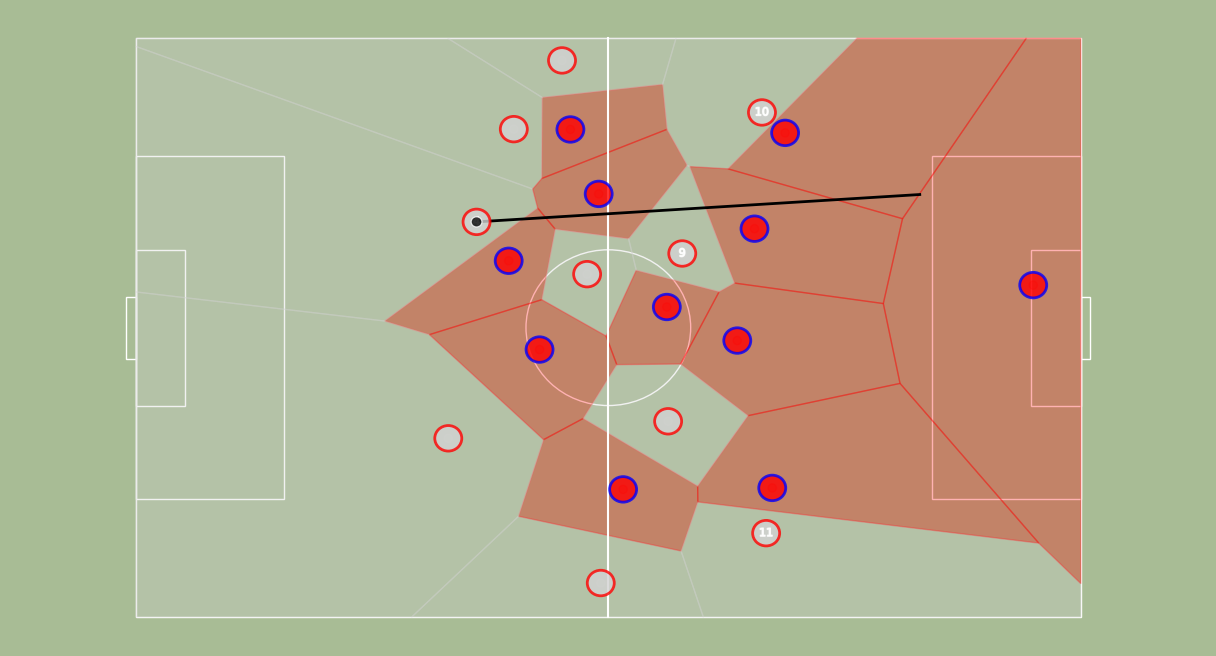

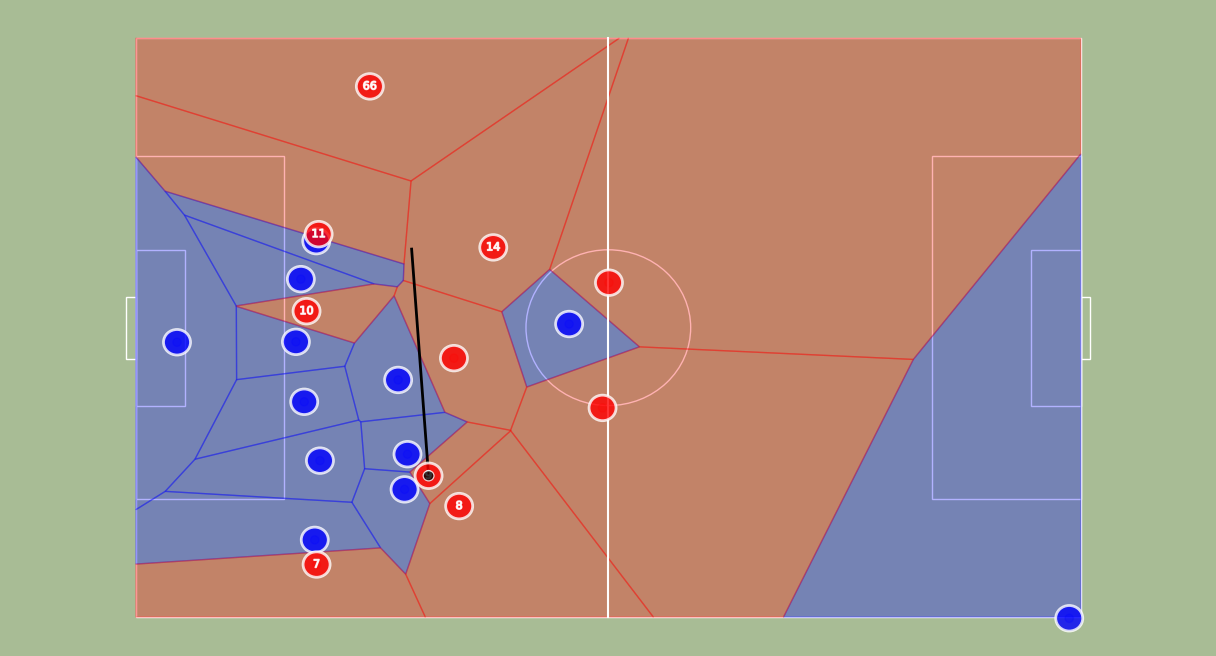

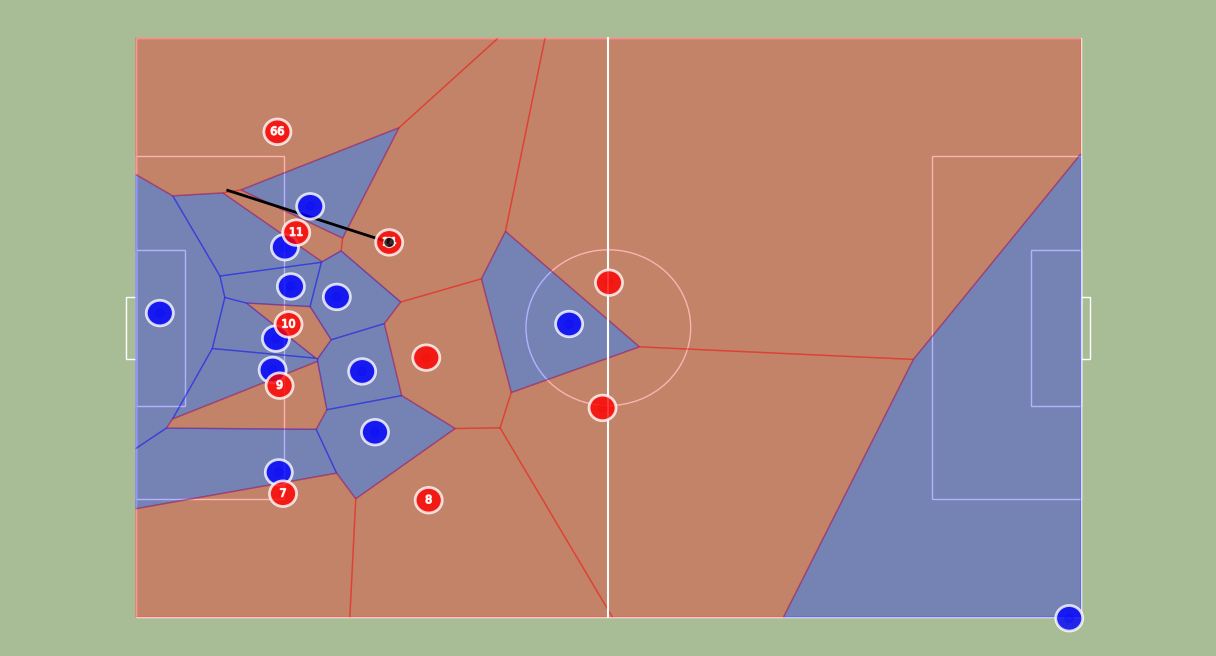

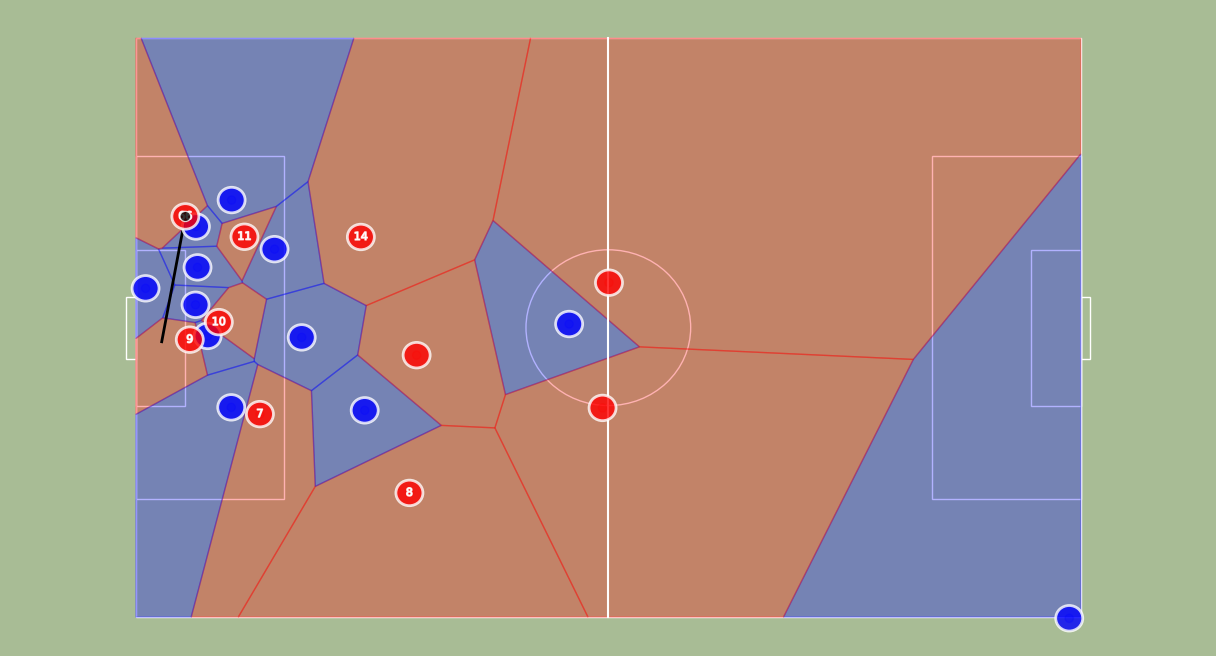

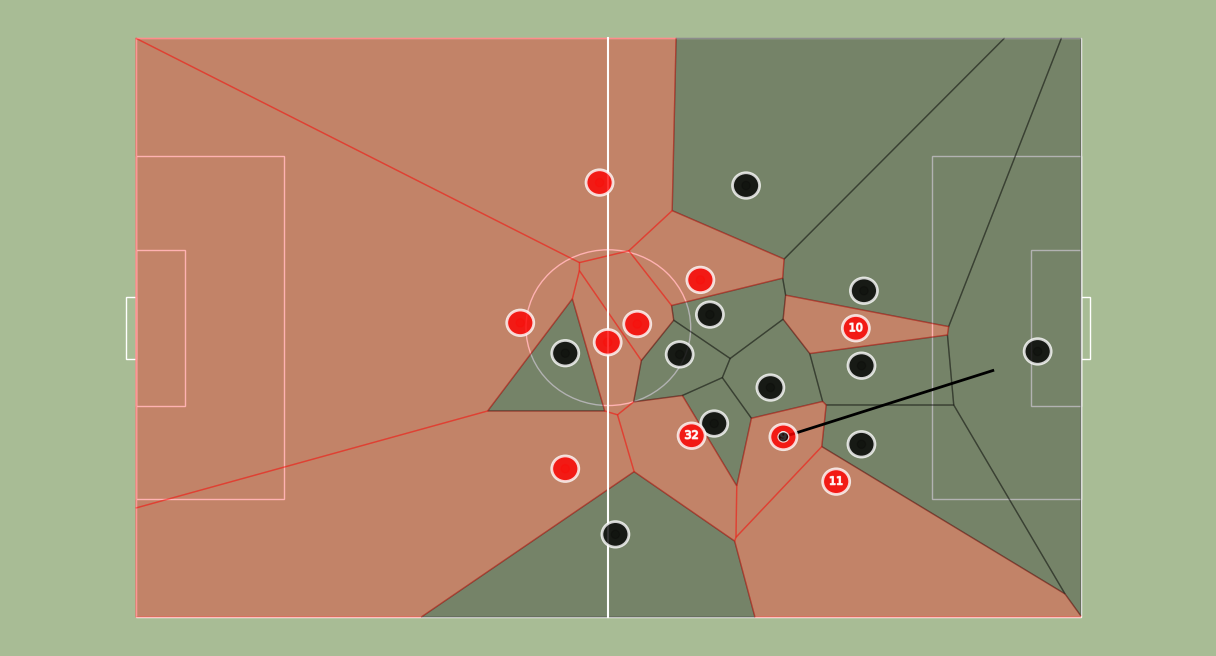

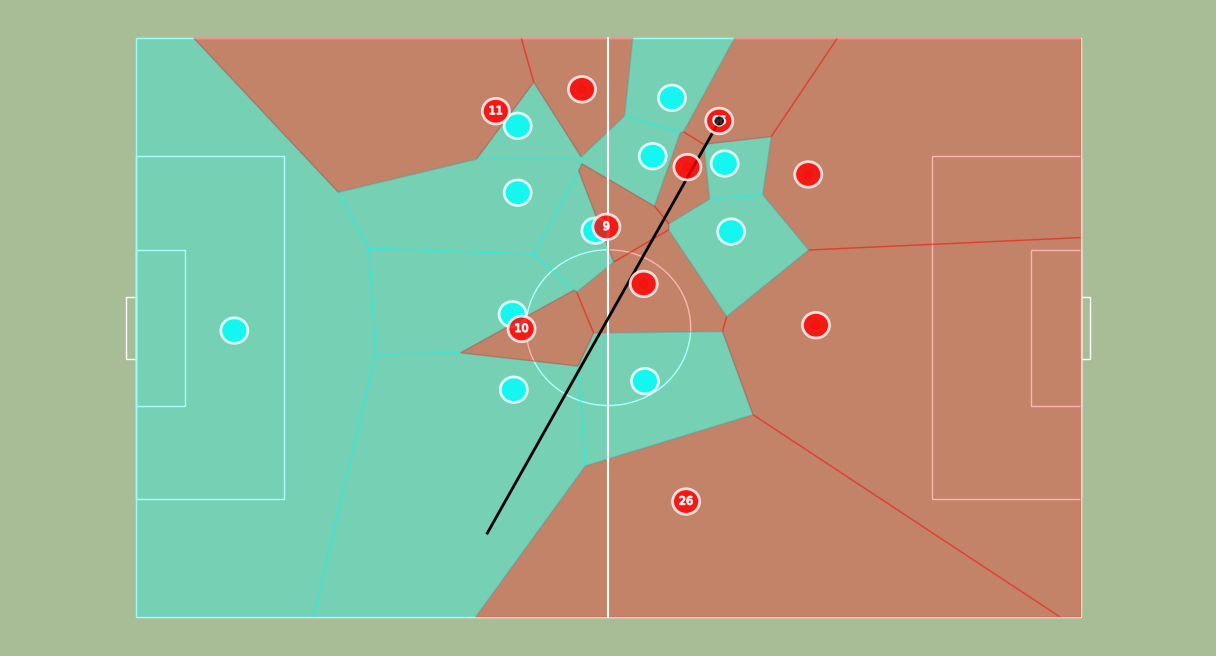

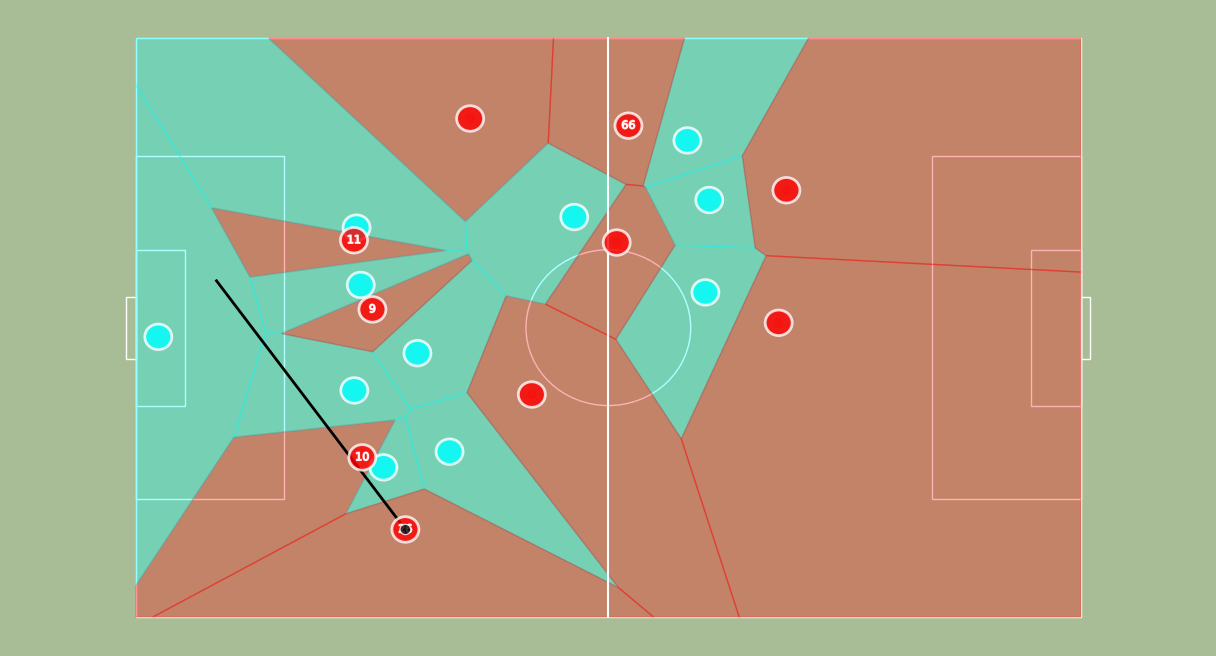

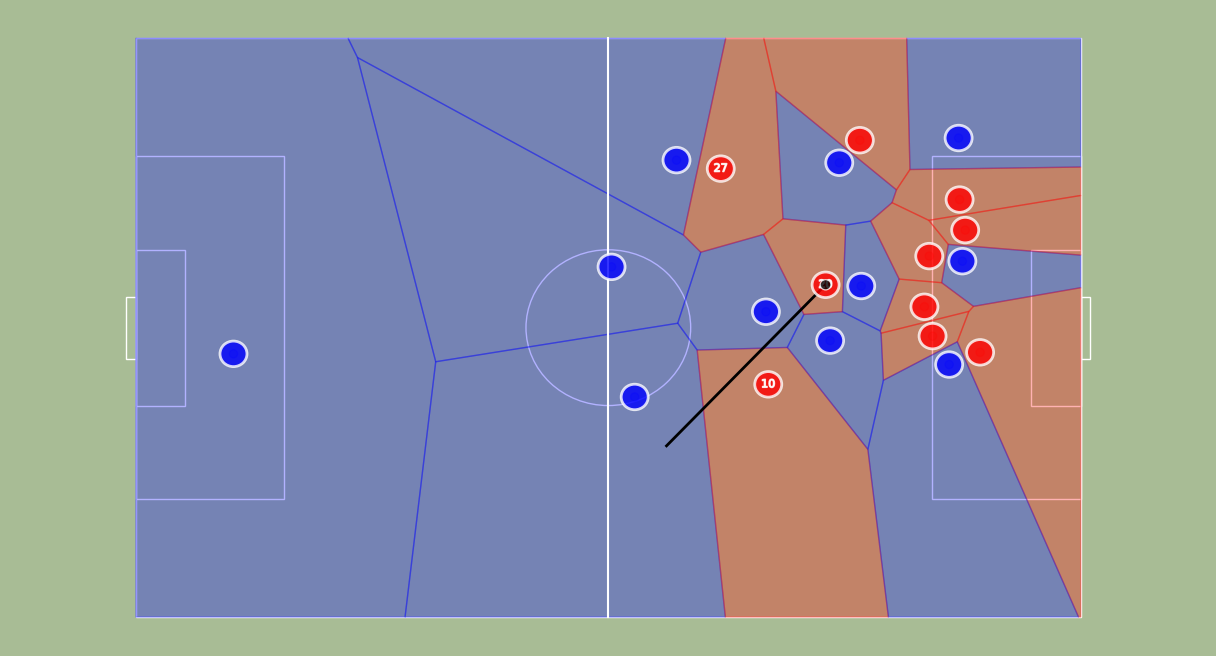

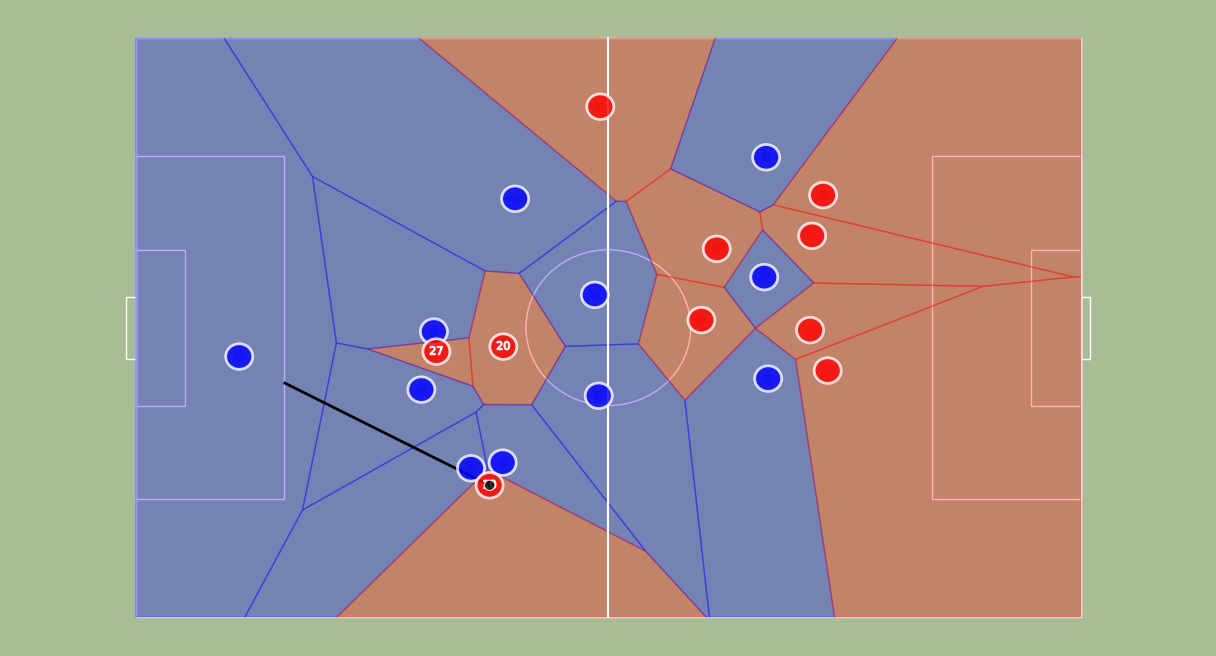

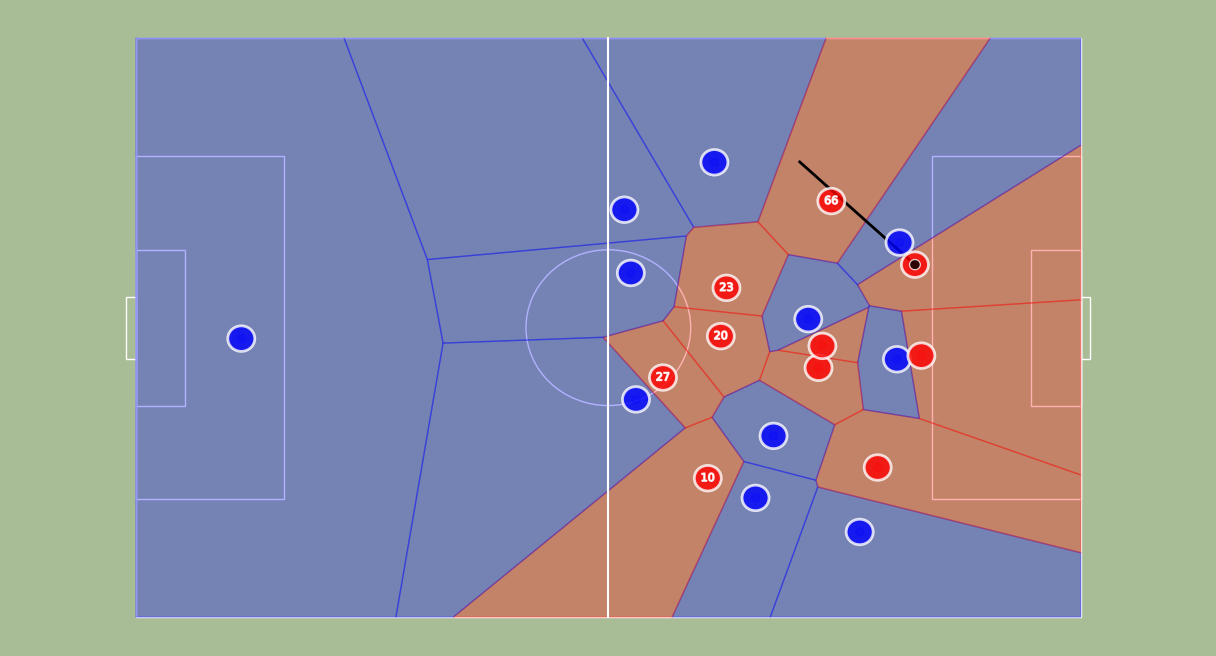

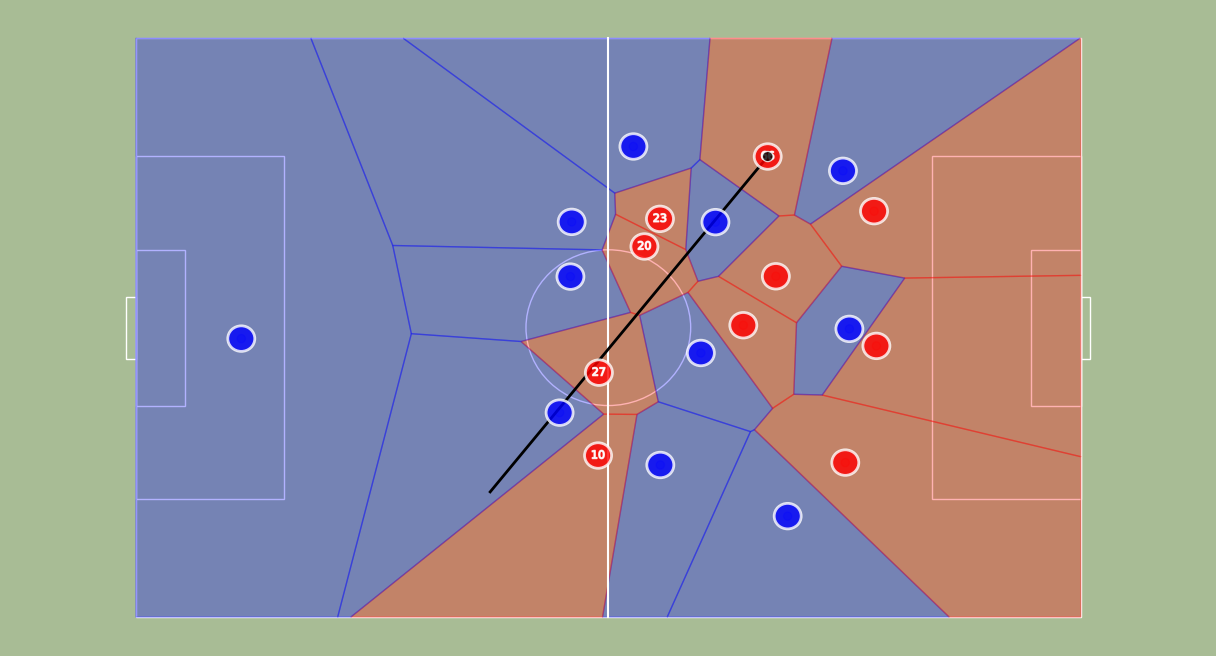

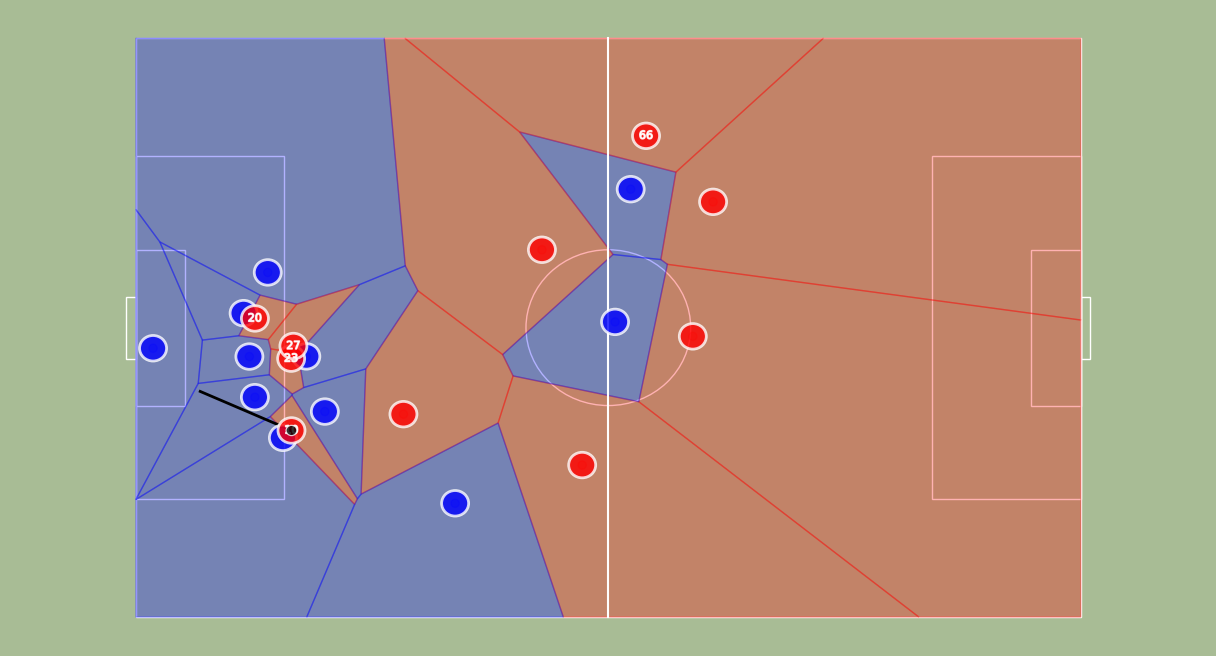

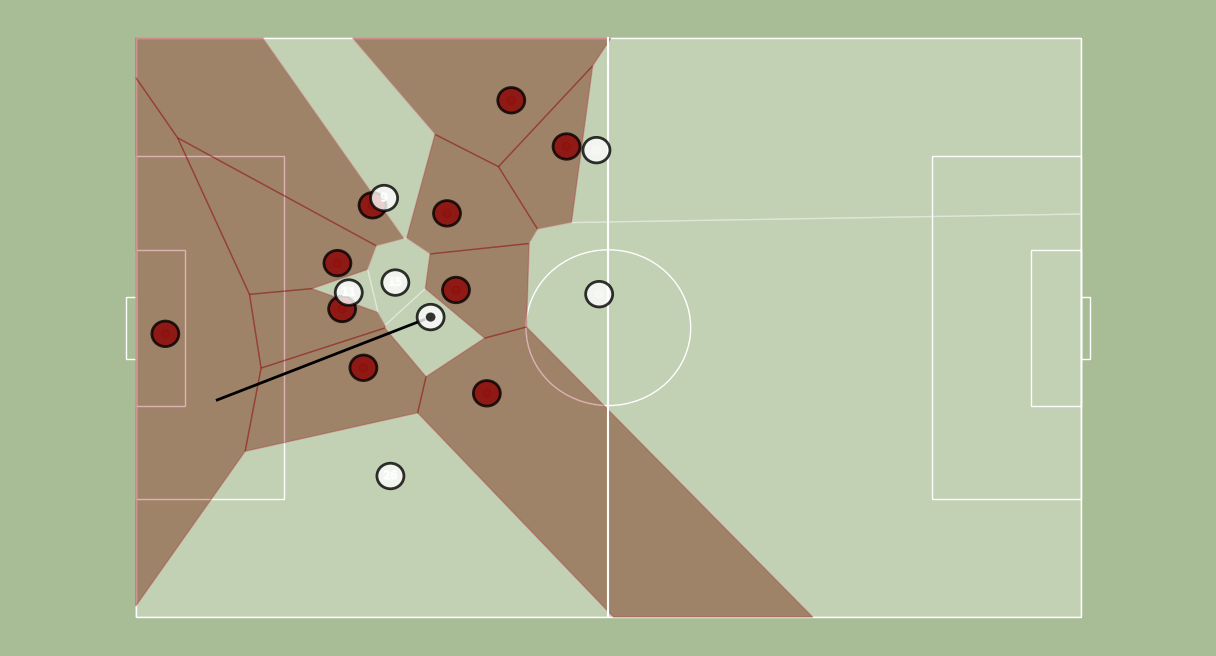

In [26]:
# for each play draw shot location
for play in betweens:
   df = liverpool_data.loc[play]
   df_events = liverpool_passes.query("play == '"+play+"'")
   events = plays_data[play]['events']
   for row in events.iterrows():
      if row[1]['Type'] == 'PASS':
         title = './outputs/between/'+play+'/'+play+str(row[0])+'voronoi'
         print(title)
         evnt = df_events.query("from_frame == "+str(row[1]['Start Frame']))
         fig, ax, dfFrame = footyviz.draw_frame(df, t=row[1]['Start Frame'], fps=1)
         fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
         fig, ax = footyviz.add_pass_to_fig(fig, ax, evnt['from_x'].values[0], evnt['from_y'].values[0], evnt['to_x'].values[0], evnt['to_y'].values[0])
         fig.savefig(title)

## Front press

In front press, liverpool presures in the right timing and closing the space very well.

./outputs/press/Liverpool [2] - 1 Newcastle1voronoi.png


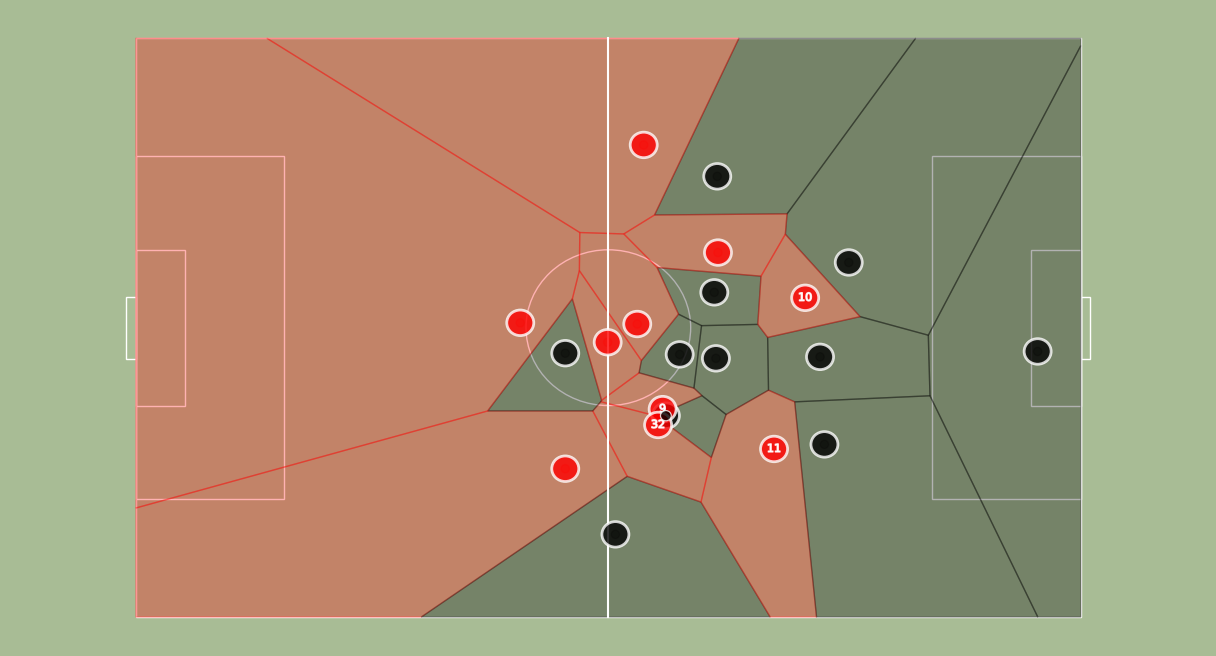

In [27]:
# for each play draw shot location
play = 'Liverpool [2] - 1 Newcastle'
df = liverpool_data.loc[play]
title = './outputs/press/'+play+'1'+'voronoi.png'
print(title)
fig, ax, dfFrame = footyviz.draw_frame(df, t=1, fps=1)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
fig.savefig(title)

./outputs/press/Liverpool [2] - 1 Newcastle1.png


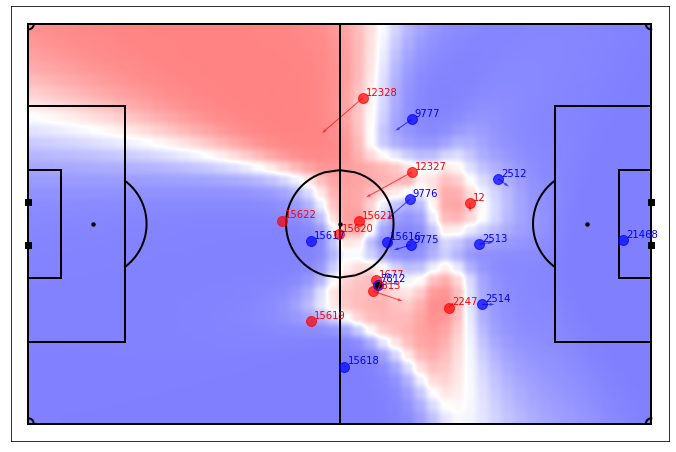

In [28]:
play = 'Liverpool [2] - 1 Newcastle'
tracking_home = plays_data[play]['tracking_home']
tracking_away = plays_data[play]['tracking_away']
events = plays_data[play]['events']
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')
players_num = plays_data[play]['players_num']
players_to_annotate = players_num.dropna
params = vpc.parameters()
frame = 1
title = './outputs/press'+'/'+play+str(frame)
print(title+'.png')
fig, ax = vpc.plot_pitch_control_for_frame(frame,tracking_home,tracking_away,events,params)
fig.savefig(title)

./outputs/press/Bournemouth 0 - 3 Liverpool1voronoi.png


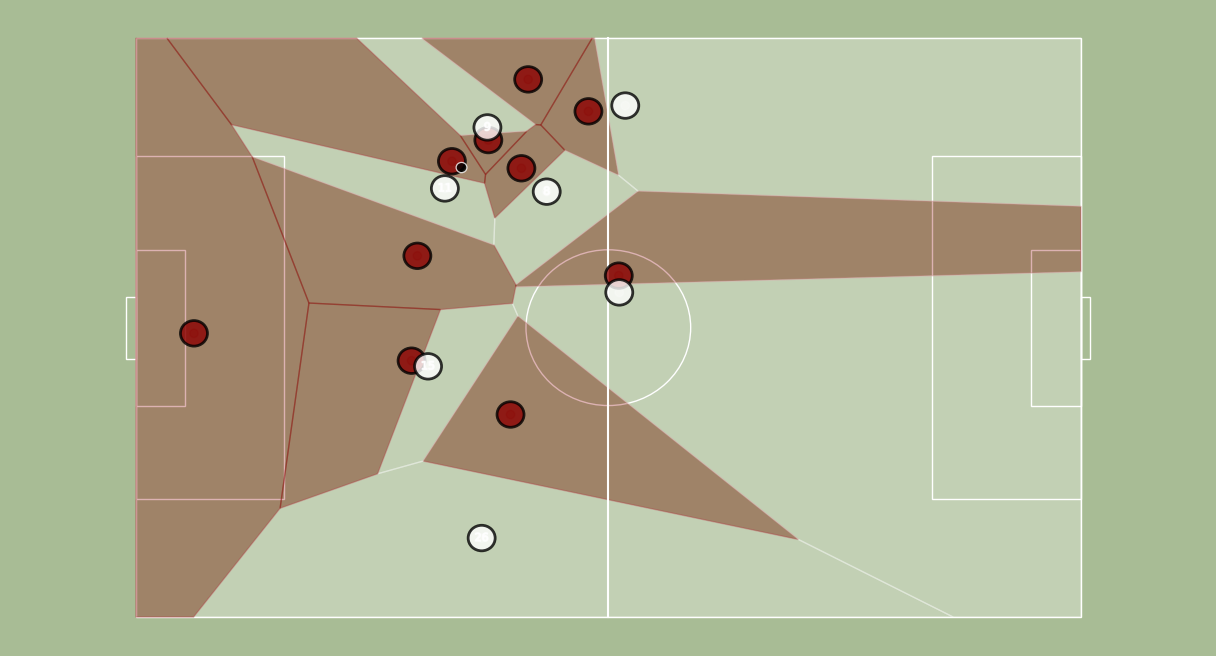

In [29]:
# for each play draw shot location
play = 'Bournemouth 0 - 3 Liverpool'
df = liverpool_data.loc[play]
title = './outputs/press/'+play+'1'+'voronoi.png'
print(title)
fig, ax, dfFrame = footyviz.draw_frame(df, t=1, fps=1)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
fig.savefig(title)

./outputs/press/Bournemouth 0 - 3 Liverpool1.png


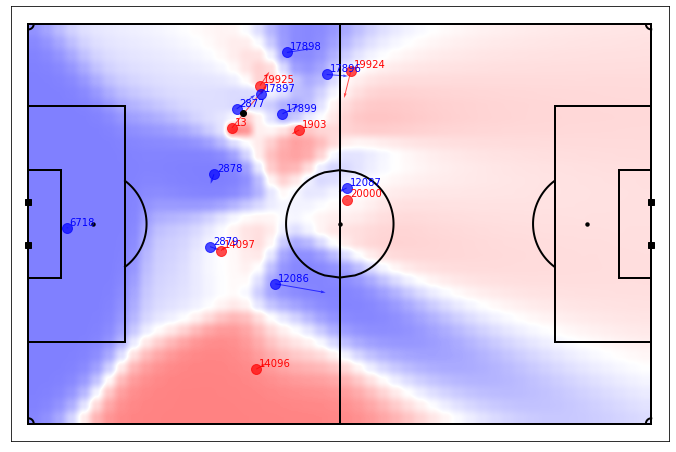

In [30]:
play = 'Bournemouth 0 - 3 Liverpool'
tracking_home = plays_data[play]['tracking_home']
tracking_away = plays_data[play]['tracking_away']
events = plays_data[play]['events']
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')
players_num = plays_data[play]['players_num']
players_to_annotate = players_num.dropna
params = vpc.parameters()
frame = 1
title = './outputs/press'+'/'+play+str(frame)
print(title+'.png')
fig, ax = vpc.plot_pitch_control_for_frame(frame,tracking_home,tracking_away,events,params)
fig.savefig(title)

./outputs/press/Genk 0 - [3] Liverpool1voronoi.png


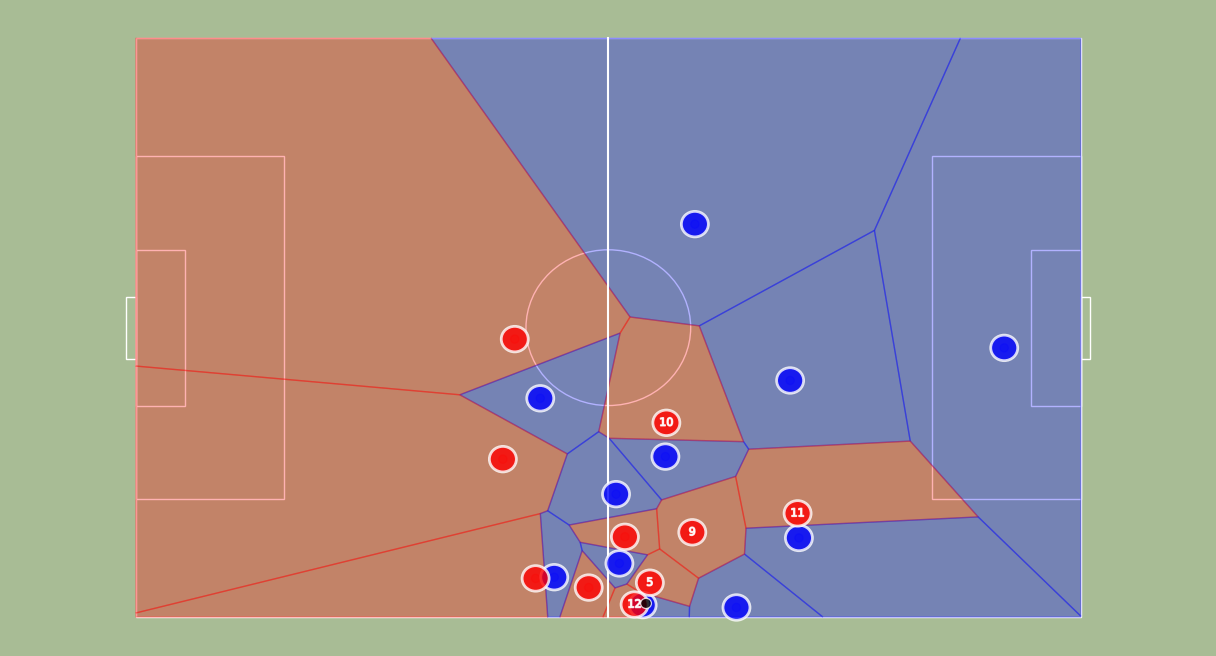

In [31]:
# for each play draw shot location
play = 'Genk 0 - [3] Liverpool'
df = liverpool_data.loc[play]
title = './outputs/press/'+play+'1'+'voronoi.png'
print(title)
fig, ax, dfFrame = footyviz.draw_frame(df, t=1, fps=1)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
fig.savefig(title)

./outputs/press/Genk 0 - [3] Liverpool1.png


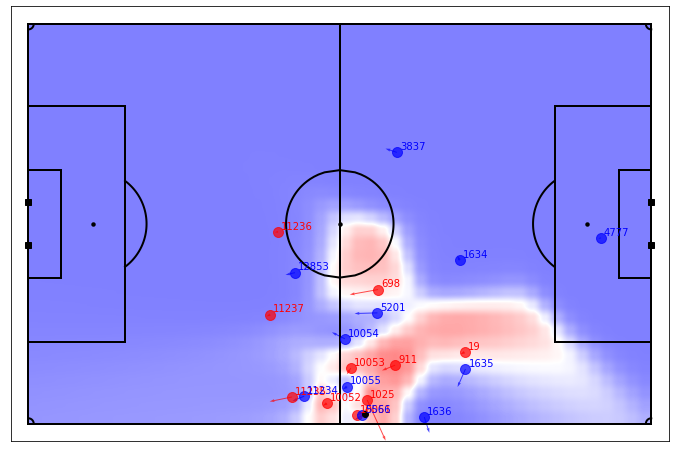

In [32]:
play = 'Genk 0 - [3] Liverpool'
tracking_home = plays_data[play]['tracking_home']
tracking_away = plays_data[play]['tracking_away']
events = plays_data[play]['events']
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')
players_num = plays_data[play]['players_num']
players_to_annotate = players_num.dropna
params = vpc.parameters()
frame = 1
title = './outputs/press'+'/'+play+str(frame)
print(title+'.png')
fig, ax = vpc.plot_pitch_control_for_frame(frame,tracking_home,tracking_away,events,params)
fig.savefig(title)

./outputs/press/Liverpool [2] - 1 Chelsea1voronoi.png


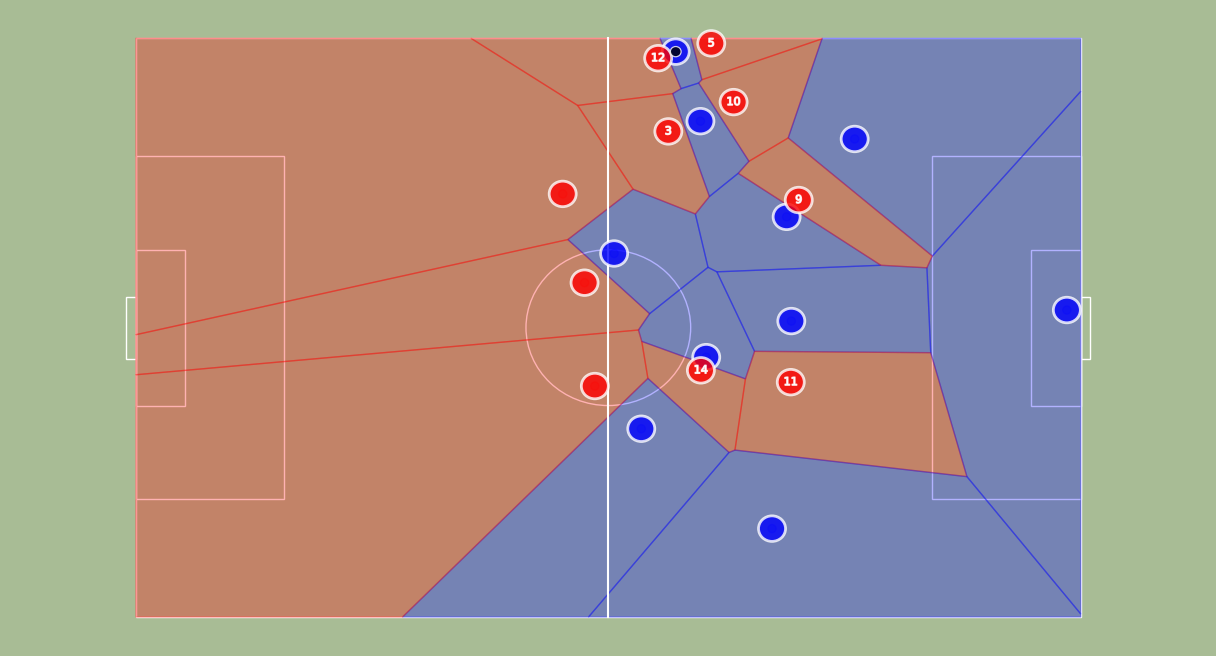

In [33]:
# for each play draw shot location
play = 'Liverpool [2] - 1 Chelsea'
df = liverpool_data.loc[play]
title = './outputs/press/'+play+'1'+'voronoi.png'
print(title)
fig, ax, dfFrame = footyviz.draw_frame(df, t=1, fps=1)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
fig.savefig(title)

./outputs/press/Liverpool [2] - 1 Chelsea1.png


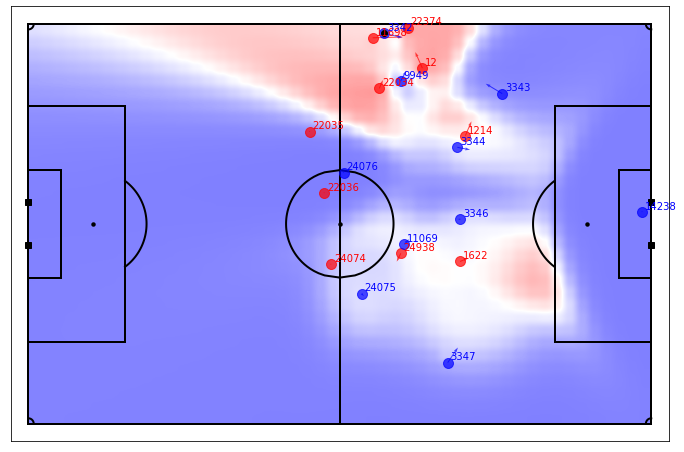

In [34]:
play = 'Liverpool [2] - 1 Chelsea'
tracking_home = plays_data[play]['tracking_home']
tracking_away = plays_data[play]['tracking_away']
events = plays_data[play]['events']
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')
players_num = plays_data[play]['players_num']
players_to_annotate = players_num.dropna
params = vpc.parameters()
frame = 1
title = './outputs/press'+'/'+play+str(frame)
print(title+'.png')
fig, ax = vpc.plot_pitch_control_for_frame(frame,tracking_home,tracking_away,events,params)
fig.savefig(title)

Well, we all now how Salah and Mané are dangerous. Let's take a closer look at why.

Let's analyse also the movements Trent and Firmino do, as they prove themselfs very realiable options on attack.

## Mané and Salah's movement on goals

In [20]:
frames=[132,130,168,232,178,234,120,136,116,163,89,164,152,140,168,244,126,192,96]
scorers=[11,10,10,11,9,11,27,10,27,10,10,26,10,11,27,23,11,11,9]
goals=pd.DataFrame(np.array([frames,scorers]).T,columns=['frame','player_num'],index=plays)

# draw pitch
fig,ax = mviz.plot_pitch()

color = {
   "10": "yo",
   "11": "ro"
}

# for each play draw shot location
for play in plays:
   
   tracking_home = plays_data[play]['tracking_home']
   x_ball = tracking_home['ball_x'].values
   y_ball = tracking_home['ball_y'].values
   if goals.loc[play,'player_num'] in [11,10]:
      # goal frame
      goal_frame=goals.loc[play,'frame']
      
      # convert as Liverpool attacked in the same direction (right)
      if x_ball[-1]<0:
         x_ball = - x_ball
         y_ball = - y_ball
      

      ax.plot(x_ball[goal_frame],y_ball[goal_frame],color[str(goals.loc[play,'player_num'])],markersize=10)
      
      # legend
      if play==plays[0]:
         ax.plot(x_ball[goal_frame],y_ball[goal_frame],'yo',markersize=10,label="Mané's shots location")
         ax.plot(x_ball[goal_frame],y_ball[goal_frame],'ro',markersize=10,label="Salah's shots location")

ax.legend(loc='upper left')
plt.savefig('./outputs/mane_salah_goals.png')
plt.close()

### Mané

In [21]:
# # for each play draw shot location
# for play in plays:
#    # draw pitch
#    fig,ax = mviz.plot_pitch()
#    players_num = plays_data[play]['players_num']
#    players_num.columns = ['playerid','num']
#    try:
#       mane_id = players_num.query('num==10')['playerid'].values[0]
#    except:
#       mane_id = 0
#    if mane_id:
#       tracking_home = plays_data[play]['tracking_home']
#       x_mane = tracking_home['Home_'+str(mane_id)+'_x'].values
#       y_mane = tracking_home['Home_'+str(mane_id)+'_y'].values

#       # goal frame
#       goal_frame=goals.loc[play,'frame']

#       # convert as Liverpool attacked in the same direction (right)
#       if x_mane[-1]<0:
#          x_mane = - x_mane
#          y_mane = - y_mane

#       ax.plot(x_mane,y_mane,'r',markersize=10)
#       ax.plot(x_mane[0],y_mane[0],'ro',markersize=10)

#       # # legend
#       # if play==plays[0]:
#       #    ax.plot(x_ball[goal_frame],y_ball[goal_frame],'r',markersize=10,label='mane movement')
# ax.legend(loc='upper left')

In [22]:
# # for each play draw shot location
# for play in plays:
#    # draw pitch
#    # fig,ax = mviz.plot_pitch()
#    players_num = plays_data[play]['players_num']
#    players_num.columns = ['playerid','num']
#    try:
#       mane_id = players_num.query('num==10')['playerid'].values[0]
#    except:
#       mane_id = 0
#    if mane_id:
#       tracking_home = plays_data[play]['tracking_home']
#       tracking_away = plays_data[play]['tracking_away']

#       mviz.save_match_clip(tracking_home, tracking_away, 'outputs', fname="mane/mane_movement_game_"+play, include_player_velocities=False, players_fixed=[mane_id])

#       # # legend
#       # if play==plays[0]:
#       #    ax.plot(x_ball[goal_frame],y_ball[goal_frame],'r',markersize=10,label='mane movement')
# ax.legend(loc='upper left')

### Salah

In [23]:
# # for each play draw shot location
# for play in plays:
#    # draw pitch
#    # fig,ax = mviz.plot_pitch()
#    players_num = plays_data[play]['players_num']
#    players_num.columns = ['playerid','num']
#    try:
#       salah_id = players_num.query('num==11')['playerid'].values[0]
#    except:
#       salah_id = 0
#    if salah_id:
#       tracking_home = plays_data[play]['tracking_home']
#       tracking_away = plays_data[play]['tracking_away']

#       mviz.save_match_clip(tracking_home, tracking_away, 'outputs', fname="/salah/salah_movement_game_"+play, include_player_velocities=False, players_fixed=[salah_id])

# ax.legend(loc='upper left')

## Firmino's movement on goals

In [21]:
firmino = [
   'Fulham 0 - [1] Liverpool',
   'Southampton 1 - [2] Liverpool',
   'Liverpool [2] - 0 Porto',
   'Liverpool [2] - 1 Chelsea',
   'Liverpool [2] - 1 Newcastle',
   'Genk 0 - [3] Liverpool',
   'Leicester 0 - [3] Liverpool',
   'Bournemouth 0 - 3 Liverpool',
   'Liverpool [2] - 0 Salzburg',
   'Liverpool [3] - 0 Norwich'
]

In [22]:
from moviepy import editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage

def draw_frame_x(df, t, fps, voronoi=False):
   fig,ax,dfFrame = footyviz.draw_frame(df, t=t, fps=fps)
   if voronoi:
      fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
   image = mplfig_to_npimage(fig)
   plt.close()
   return image    

def make_animation(df, fps=20, voronoi=False):
   #calculated variables
   length=(df.index.max()+20)/fps
   clip = mpy.VideoClip(lambda x: draw_frame_x(df, t=x, fps=fps, voronoi=voronoi), duration=length-1).set_fps(fps)
   return clip

for play in firmino:
   if play in ['Liverpool [2] - 0 Salzburg','Liverpool [3] - 0 Norwich']:
      df = liverpool_data.loc[play]
      clip = make_animation(df,voronoi=True)

      # clip.ipython_display()
      clip.write_videofile("./outputs/firmino/0voronoi"+play+".mp4")
      clip.close()

Moviepy - Building video ./outputs/firmino/0voronoiLiverpool [2] - 0 Salzburg.mp4.
Moviepy - Writing video ./outputs/firmino/0voronoiLiverpool [2] - 0 Salzburg.mp4



Moviepy - Done !
Moviepy - video ready ./outputs/firmino/0voronoiLiverpool [2] - 0 Salzburg.mp4
Moviepy - Building video ./outputs/firmino/0voronoiLiverpool [3] - 0 Norwich.mp4.
Moviepy - Writing video ./outputs/firmino/0voronoiLiverpool [3] - 0 Norwich.mp4



Moviepy - Done !
Moviepy - video ready ./outputs/firmino/0voronoiLiverpool [3] - 0 Norwich.mp4


In [24]:
# # for each play draw shot location
# for play in plays:
#    # draw pitch
#    # fig,ax = mviz.plot_pitch()
#    players_num = plays_data[play]['players_num']
#    players_num.columns = ['playerid','num']
#    try:
#       firmino_id = players_num.query('num==9')['playerid'].values[0]
#    except:
#       firmino_id = 0
#    if firmino_id:
#       tracking_home = plays_data[play]['tracking_home']
#       tracking_away = plays_data[play]['tracking_away']

#       mviz.save_match_clip(tracking_home, tracking_away, 'outputs', fname="/firmino/firmino_movement_game_"+play, include_player_velocities=False, players_fixed=[firmino_id])

# ax.legend(loc='upper left')

## Trent movement on goals

In [44]:
trent = [
   'Liverpool [2] - 0 Porto',
   'Liverpool [1] - 0 Wolves',
   'Leicester 0 - [3] Liverpool',
   'Liverpool [2] - 0 Salzburg',
   'Porto 0 - [2] Liverpool',
   'Liverpool [3] - 0 Norwich',
   'Liverpool [2] - 0 Man City', 
   'Liverpool [2] - 0 Everton',
]

In [45]:
for play in trent:
   events = plays_data[play]['events']
   for row in events.iterrows():
      if row[1]['Type'] == 'PASS':
         frame = row[1]['Start Frame']
         print(play, frame)

Liverpool [1] - 0 Wolves 0
Liverpool [1] - 0 Wolves 42
Liverpool [1] - 0 Wolves 70
Liverpool [1] - 0 Wolves 108
Liverpool [3] - 0 Norwich 28
Liverpool [3] - 0 Norwich 80


In [42]:
for play in trent:
   tracking_home = plays_data[play]['tracking_home']
   tracking_away = plays_data[play]['tracking_away']
   events = plays_data[play]['events']
   tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
   tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')
   players_num = plays_data[play]['players_num']
   players_to_annotate = players_num.dropna
   df_events = liverpool_passes.query("play == '"+play+"'")
   df = liverpool_data.loc[play]
   for row in events.iterrows():
      if row[1]['Type'] == 'PASS':
         frame = row[1]['Start Frame']
         title = './outputs/trent/trent_'+play+str(frame)+'distancevoronoi'
         print(title)
         evnt = df_events.query("from_frame == "+str(frame))
         fig, ax, dfFrame = footyviz.draw_frame(df, t=frame, fps=1)
         fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
         fig, ax = footyviz.add_pass_to_fig(fig, ax, evnt['from_x'].values[0], evnt['from_y'].values[0], evnt['to_x'].values[0], evnt['to_y'].values[0],distance=True)
         fig.savefig(title)
         plt.close()

         params = vpc.parameters()
         # print(row)
         title = './outputs/trent'+'/trent_'+play+str(frame)
         print(title+'.png')
         fig, ax = vpc.plot_pitch_control_for_frame(frame,tracking_home,tracking_away,events,params)
         fig.savefig(title)
         plt.close()

./outputs/trent/trent_Liverpool [2] - 0 Man City0distancevoronoi
./outputs/trent/trent_Liverpool [2] - 0 Man City0.png
./outputs/trent/trent_Liverpool [2] - 0 Man City100distancevoronoi
./outputs/trent/trent_Liverpool [2] - 0 Man City100.png
./outputs/trent/trent_Liverpool [2] - 0 Everton0distancevoronoi
./outputs/trent/trent_Liverpool [2] - 0 Everton0.png
./outputs/trent/trent_Liverpool [2] - 0 Everton62distancevoronoi
./outputs/trent/trent_Liverpool [2] - 0 Everton62.png
./outputs/trent/trent_Liverpool [2] - 0 Everton214distancevoronoi
./outputs/trent/trent_Liverpool [2] - 0 Everton214.png


In [52]:
play = 'Liverpool [3] - 0 Norwich'
tracking_home = plays_data[play]['tracking_home']
tracking_away = plays_data[play]['tracking_away']
events = plays_data[play]['events']
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True,filter_='moving_average')
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True,filter_='moving_average')
players_num = plays_data[play]['players_num']
players_to_annotate = players_num.dropna
df_events = liverpool_passes.query("play == '"+play+"'")
df = liverpool_data.loc[play]

frame = 28
title = './outputs/trent/trent_'+play+str(frame)+'distancevoronoi'
print(title)
evnt = df_events.query("from_frame == "+str(frame))
fig, ax, dfFrame = footyviz.draw_frame(df, t=frame, fps=1)
fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
fig, ax = footyviz.add_pass_to_fig(fig, ax, evnt['from_x'].values[0], evnt['from_y'].values[0], evnt['to_x'].values[0], evnt['to_y'].values[0],distance=True)
fig.savefig(title)
plt.close()

params = vpc.parameters()
# print(row)
title = './outputs/trent'+'/trent_'+play+str(frame)
print(title+'.png')
fig, ax = vpc.plot_pitch_control_for_frame(frame,tracking_home,tracking_away,events,params)
fig.savefig(title)
plt.close()

./outputs/trent/trent_Liverpool [3] - 0 Norwich28distancevoronoi
./outputs/trent/trent_Liverpool [3] - 0 Norwich28.png


In [22]:
# from moviepy import editor as mpy
# from moviepy.video.io.bindings import mplfig_to_npimage

# def draw_frame_x(df, t, fps, voronoi=False):
#    fig,ax,dfFrame = footyviz.draw_frame(df, t=t, fps=fps)
#    if voronoi:
#       fig, ax, dfFrame = footyviz.add_voronoi_to_fig(fig, ax, dfFrame)
#    image = mplfig_to_npimage(fig)
#    plt.close()
#    return image    

# def make_animation(df, fps=20, voronoi=False):
#    #calculated variables
#    length=(df.index.max()+20)/fps
#    clip = mpy.VideoClip(lambda x: draw_frame_x(df, t=x, fps=fps, voronoi=voronoi), duration=length-1).set_fps(fps)
#    return clip

# for play in trent:
#    # if play in ['Liverpool [2] - 0 Salzburg','Liverpool [3] - 0 Norwich']:
#    df = liverpool_data.loc[play]
#    clip = make_animation(df,voronoi=True)

#    # clip.ipython_display()
#    clip.write_videofile("./outputs/trent/0voronoi"+play+".mp4")
#    clip.close()